# 1. Business Understanding (Phase CRISP-DM)
### Contexte Global :
En Tunisie, la sécurité routière est un enjeu de santé publique majeur. Selon l'Observatoire National de la Sécurité Routière (ONSR), le non-respect du code de la route et le défaut d'équipement de sécurité (comme le casque) sont les causes principales de mortalité. Les méthodes de surveillance manuelles étant limitées, l'automatisation par Intelligence Artificielle devient une nécessité.

### Objectif du Projet Final :
Développer une solution intelligente de surveillance routière capable de :

##### * Identifier les véhicules (Détection de plaques).

##### * Extraire les informations d'immatriculation (OCR des plaques tunisiennes).

##### * Vérifier la conformité sécuritaire (Détection du port du casque).

### Spécificité de ce module :

#### 01_Detection_Plaques.ipynb :
Ce notebook se concentre sur la localisation précise des plaques d'immatriculation sur les véhicules en circulation.

#### 02_OCR_CNN_From_Scratch.ipynb :
Ce notebook est dédié à la lecture optique des caractères (OCR) sur les plaques détectées, en utilisant une architecture CNN conçue "from scratch".

#### 03_Detection_Casques.ipynb :
Ce notebook traite de la détection du port du casque, permettant d'identifier les infractions de sécurité des motards.


# **Installation des bibliothèques nécessaires**

In [5]:
import sys
!"{sys.executable}" -m pip install -U pip
!"{sys.executable}" -m pip install numpy pandas matplotlib

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
  Using cached matplotlib-3.10.8-cp312-cp312-win_amd64.whl.metadata (52 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp312-cp312-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.1-py3-none-any.whl.metadata (5.6 kB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   --------------------------------------

In [7]:
import sys
!"{sys.executable}" -m pip install --upgrade pip
!"{sys.executable}" -m pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.6.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/110.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/110.9 MB 699.0 kB/s eta 0:02:38
   ---------------------------------------- 0.5/110.9 MB 699.0 kB/s eta 0:02:38
   ---------------------------------------- 0.8/110.9 MB 745.8 kB/s eta 0:02:28
   ---------------------------------------- 1.0/110.9 MB 774.8 kB/s eta 0:02:22
   ---------------------------------------- 1.0/110.9 MB 774.8 kB/s eta 0:02:22
   ---------------------------------------- 1.0/110.9 MB 774.8 kB/s e

In [13]:
import sys
!"{sys.executable}" -m pip install -U pip
!"{sys.executable}" -m pip install opencv-python

  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
    --------------------------------------- 0.3/12.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.6 MB 985.5 kB/s eta 0:00:13
   - -------------------------------------- 0.5/12.6 MB 985.5 kB/s eta 0:00:13
   -- ------------------------------------- 0.8/12.6 MB 1.0 MB/s eta 0:00:12
   --- ------------------------------------ 1.0/12.6 MB 1.0 MB/s eta 0:00:12
   ---- ----------------------------------- 1.3/12.6 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/12.6 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/12.6 MB 1.1 MB/s eta 0:00:11
   ---- ----------------------------------- 1.6/12.6 MB 1.1 MB/s eta 0:00:11
   ------ ---------

  You can safely remove it manually.
  You can safely remove it manually.


In [14]:
import cv2
print("cv2 OK:", cv2.__version__)

cv2 OK: 4.12.0


In [8]:
# Bibliothèques nécessaires
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image
import requests
import zipfile
import json
import glob
import random
from tqdm import tqdm

In [4]:
import sys
print(sys.executable)
print(sys.version)

c:\Users\PC\AppData\Local\Programs\Python\Python312\python.exe
3.12.10 (tags/v3.12.10:0cc8128, Apr  8 2025, 12:21:36) [MSC v.1943 64 bit (AMD64)]


In [ ]:
!pip install --upgrade dataset-tools

In [24]:
import sys
!"{sys.executable}" -m pip install -U pip
!"{sys.executable}" -m pip install dataset-tools

In [22]:
import sys
!"{sys.executable}" -m pip install -U pip setuptools

  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 70.2.0
    Uninstalling setuptools-70.2.0:
      Successfully uninstalled setuptools-70.2.0


In [26]:
import sys
!"{sys.executable}" -m pip install -U supervisely

In [28]:
import sys
!"{sys.executable}" -m pip install setuptools==70.0.0

   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/863.4 kB ? eta -:--:--
   ------------ --------------------------- 262.1/863.4 kB ? eta -:--:--
   ------------ --------------------------- 262.1/863.4 kB ? eta -:--:--
   ------------ --------------------------- 262.1/863.4 kB ? eta -:--:--


In [29]:
import dataset_tools as dtools
print("dataset_tools OK")

ModuleNotFoundError: No module named 'distutils'

In [30]:
from pathlib import Path
import dataset_tools as dtools

dst_dir = Path(r"C:\Users\PC\Documents\Projet\data")
dst_dir.mkdir(parents=True, exist_ok=True)

out_path = dtools.download(dataset="Tunisian Licensed Plates", dst_dir=str(dst_dir))
print("Dataset téléchargé dans :", out_path)


ModuleNotFoundError: No module named 'distutils'

In [1]:
!pip install kaggle

  Using cached bleach-6.3.0-py3-none-any.whl.metadata (31 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-win_amd64.whl.metadata (38 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached certifi-2025.11.12-py3-none-any.whl.metadata (2.5 kB)
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 1.2 MB/s eta 0:00:01
   ---------------------- --------


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # Pour Colab. Sur votre machine, le chemin est souvent '~/.kaggle'

In [10]:
import zipfile

# 1. Définir le nom du dataset Kaggle et le dossier de destination
# Le nom se trouve dans l'URL : riotulab/saudi-license-plate-characters
dataset_name = "riotulab/saudi-license-plate-characters"
destination_folder = "./data/saudi_license_plates"  # Dossier où les fichiers seront placés

# 2. Créer le dossier de destination s'il n'existe pas
os.makedirs(destination_folder, exist_ok=True)

# 3. Télécharger le dataset via l'API Kaggle
# La commande 'kaggle datasets download' est exécutée dans le terminal
!kaggle datasets download -d {dataset_name} -p {destination_folder}

# 4. Chemin du fichier zip téléchargé
zip_path = os.path.join(destination_folder, "saudi-license-plate-characters.zip")

# 5. Extraire le contenu du fichier zip
if os.path.exists(zip_path):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(destination_folder)
    print(f" Dataset téléchargé et extrait avec succès dans : {destination_folder}")
else:
    print(" Le fichier zip n'a pas été trouvé. Vérifiez le téléchargement.")


  0%|          | 0.00/8.71M [00:00<?, ?B/s]
 11%|█▏        | 1.00M/8.71M [00:01<00:09, 856kB/s]
 23%|██▎       | 2.00M/8.71M [00:02<00:07, 1.00MB/s]
 34%|███▍      | 3.00M/8.71M [00:03<00:05, 1.06MB/s]
 46%|████▌     | 4.00M/8.71M [00:04<00:04, 1.07MB/s]
 57%|█████▋    | 5.00M/8.71M [00:04<00:03, 1.17MB/s]
 69%|██████▉   | 6.00M/8.71M [00:05<00:02, 1.17MB/s]
 80%|████████  | 7.00M/8.71M [00:06<00:01, 1.13MB/s]
 92%|█████████▏| 8.00M/8.71M [00:07<00:00, 1.19MB/s]
100%|██████████| 8.71M/8.71M [00:08<00:00, 1.05MB/s]
100%|██████████| 8.71M/8.71M [00:08<00:00, 1.08MB/s]


Dataset URL: https://www.kaggle.com/datasets/riotulab/saudi-license-plate-characters
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)

 Dataset téléchargé et extrait avec succès dans : ./data/saudi_license_plates


In [16]:
from pathlib import Path

root = Path(".").resolve()
print("Projet:", root)

candidates = list(root.rglob("tunisian-licensed-plates"))
print("Trouvé:", candidates[:10])
print("Nb trouvés:", len(candidates))

Projet: C:\Users\PC\Documents\Projet
Trouvé: []
Nb trouvés: 0


In [11]:
# Créer un dossier dans /content/ pour votre projet
!mkdir -p /content/tunisian-licensed-plates

# Copier TOUT le dataset tunisien
!cp -r /root/dataset-ninja/tunisian-licensed-plates /content/data/tunisian-licensed-plates

print(" Dataset copié vers : /content/projet_securite_routiere/tunisian-licensed-plates/")

The syntax of the command is incorrect.


 Dataset copié vers : /content/projet_securite_routiere/tunisian-licensed-plates/


'cp' is not recognized as an internal or external command,
operable program or batch file.


# **Exploration du dataset tunisien (détection de plaques)**

In [33]:
import os
from pathlib import Path

# ✅ Mets ici le dossier RACINE réel du dataset (celui qui contient train/ et test/)
tunisian_path = Path(r"C:\Users\PC\Documents\Projet\data\tunisian-licensed-plates")

print("EXPLORATION DU DATASET TUNISIEN")
print("=" * 50)

def explore_real_structure(base_path: Path, max_depth=3):
    base_path = Path(base_path)
    if not base_path.exists():
        print("❌ Chemin introuvable:", base_path)
        return

    print("📁 Structure (jusqu'à profondeur", max_depth, "):")
    for root, dirs, files in os.walk(base_path):
        root_p = Path(root)
        level = len(root_p.relative_to(base_path).parts)
        if level > max_depth:
            dirs[:] = []
            continue

        indent = "  " * level
        print(f"{indent}{root_p.name}/")

        for d in dirs[:3]:
            print(f"{indent}  {d}/")
        if len(dirs) > 3:
            print(f"{indent}  ...")

        for f in files[:2]:
            print(f"{indent}  {f}")
        if len(files) > 2:
            print(f"{indent}  ...")

explore_real_structure(tunisian_path)

print("\n📊 Statistiques :")

# ✅ images: toutes extensions courantes
img_exts = {".jpg", ".jpeg", ".png", ".bmp", ".webp"}

train_imgs = [p for p in tunisian_path.rglob("train/**/*") if p.suffix.lower() in img_exts]
test_imgs  = [p for p in tunisian_path.rglob("test/**/*")  if p.suffix.lower() in img_exts]

# ✅ annotations json partout sous train/ et test/
train_anns = list(tunisian_path.rglob("train/**/*.json"))
test_anns  = list(tunisian_path.rglob("test/**/*.json"))

print(f"Images train : {len(train_imgs)}")
print(f"Images test  : {len(test_imgs)}")
print(f"Annotations train : {len(train_anns)}")
print(f"Annotations test  : {len(test_anns)}")

# Montrer quelques exemples pour confirmer
print("\nExemples images train:", [str(x) for x in train_imgs[:3]])
print("Exemples ann train   :", [str(x) for x in train_anns[:3]])


EXPLORATION DU DATASET TUNISIEN
📁 Structure (jusqu'à profondeur 3 ):
tunisian-licensed-plates/
  test/
  train/
  LICENSE.md
  meta.json
  ...
  test/
    ann/
    img/
    ann/
      0.jpg.json
      1.jpg.json
      ...
    img/
      0.jpg
      1.jpg
      ...
  train/
    ann/
    img/
    ann/
      142.jpg.json
      143.jpg.json
      ...
    img/
      142.jpg
      143.jpg
      ...

📊 Statistiques :
Images train : 567
Images test  : 142
Annotations train : 567
Annotations test  : 142

Exemples images train: ['C:\\Users\\PC\\Documents\\Projet\\data\\tunisian-licensed-plates\\train\\img\\142.jpg', 'C:\\Users\\PC\\Documents\\Projet\\data\\tunisian-licensed-plates\\train\\img\\143.jpg', 'C:\\Users\\PC\\Documents\\Projet\\data\\tunisian-licensed-plates\\train\\img\\144.jpg']
Exemples ann train   : ['C:\\Users\\PC\\Documents\\Projet\\data\\tunisian-licensed-plates\\train\\ann\\142.jpg.json', 'C:\\Users\\PC\\Documents\\Projet\\data\\tunisian-licensed-plates\\train\\ann\\143.jpg.jso

# **Afficher un échantillon avec annotations**

In [35]:
from PIL import Image, ImageOps
import numpy as np
import cv2

def load_image_correct_orientation(path):
    img = Image.open(path)
    img = ImageOps.exif_transpose(img)    
    img = img.convert("RGB")
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)  # retourne en format OpenCV


 Échantillon : 142.jpg
 Annotation trouvée : 142.jpg.json
 Nombre d'objets détectés : 1
  → Classe: license plate, BBox: [785,282,869,526]


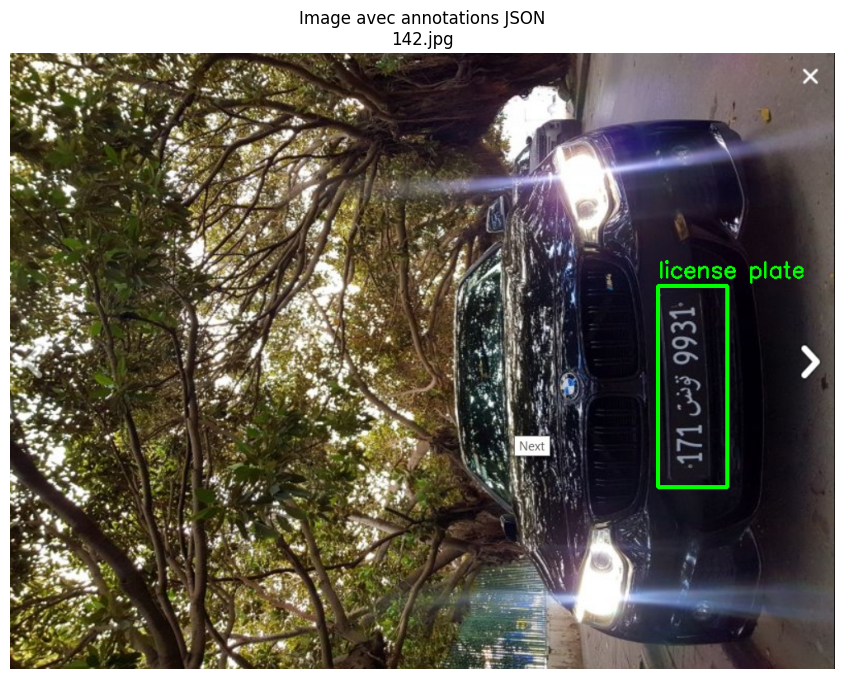

In [36]:
# 4. Afficher un échantillon avec ses annotations JSON
def show_sample_with_json_annotations():
    """Affiche une image avec ses annotations au format JSON"""

    # Prendre la première image d'entraînement
    sample_img_path = train_imgs[0]
    sample_ann_path = sample_img_path.parent.parent / 'ann' / f'{sample_img_path.stem}.jpg.json'

    print(f"\n Échantillon : {sample_img_path.name}")

    # Lire l'image
    img = cv2.imread(str(sample_img_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_h, img_w = img.shape[:2]

    # Lire l'annotation JSON
    if os.path.exists(sample_ann_path):
        with open(sample_ann_path, 'r') as f:
            annotation = json.load(f)

        print(f" Annotation trouvée : {sample_ann_path.name}")

        # Extraire les objets (bounding boxes)
        objects = annotation.get('objects', [])
        print(f" Nombre d'objets détectés : {len(objects)}")

        # Dessiner les bounding boxes
        img_with_boxes = img_rgb.copy()

        for obj in objects:
            # Coordonnées du rectangle
            points = obj.get('points', {}).get('exterior', [])
            if len(points) == 2:
                x1, y1 = points[0]
                x2, y2 = points[1]

                # Dessiner le rectangle
                cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 3)

                # Afficher la classe
                class_name = obj.get('classTitle', 'plate')
                cv2.putText(img_with_boxes, class_name, (x1, y1-10),
                           cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

                print(f"  → Classe: {class_name}, BBox: [{x1},{y1},{x2},{y2}]")

    else:
        print(f" Annotation non trouvée pour {sample_img_path.name}")
        img_with_boxes = img_rgb

    # Afficher
    plt.figure(figsize=(12, 8))
    plt.imshow(img_with_boxes)
    plt.title(f"Image avec annotations JSON\n{sample_img_path.name}")
    plt.axis('off')
    plt.show()

show_sample_with_json_annotations()

# **Convertir les annotations JSON → YOLO format**

In [37]:
print("\n CONVERSION DES ANNOTATIONS JSON → YOLO FORMAT")
print("="*50)

def convert_json_to_yolo(json_path, img_width, img_height):
    """Convertit une annotation JSON au format YOLO"""
    with open(json_path, 'r') as f:
        data = json.load(f)

    yolo_lines = []

    for obj in data.get('objects', []):
        class_name = obj.get('classTitle', 'license_plate')

        # Pour ce dataset, il n'y a qu'une classe
        class_id = 0  # license_plate = classe 0

        # Coordonnées du bounding box
        points = obj.get('points', {}).get('exterior', [])
        if len(points) == 2:
            x1, y1 = points[0]
            x2, y2 = points[1]

            # Convertir au format YOLO (normalisé)
            x_center = ((x1 + x2) / 2) / img_width
            y_center = ((y1 + y2) / 2) / img_height
            width = abs(x2 - x1) / img_width
            height = abs(y2 - y1) / img_height

            # Format YOLO: class_id x_center y_center width height
            yolo_line = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}"
            yolo_lines.append(yolo_line)

    return yolo_lines

# Tester la conversion sur un échantillon
sample_img = train_imgs[0]
sample_ann = sample_img.parent.parent / 'ann' / f'{sample_img.stem}.jpg.json'

img = cv2.imread(str(sample_img))
img_h, img_w = img.shape[:2]

yolo_annotations = convert_json_to_yolo(sample_ann, img_w, img_h)
print(f"Exemple de conversion pour {sample_img.name}:")
for line in yolo_annotations:
    print(f"  {line}")


 CONVERSION DES ANNOTATIONS JSON → YOLO FORMAT
Exemple de conversion pour 142.jpg:
  0 0.827000 0.540830 0.084000 0.326640


In [48]:
import json
from pathlib import Path

sample_json = Path(r"C:\Users\PC\Documents\Projet\data\tunisian-licensed-plates\train\ann\142.jpg.json")
data = json.loads(sample_json.read_text(encoding="utf-8"))
print(data.keys())
print(data.get("objects", [])[:1])


dict_keys(['description', 'tags', 'size', 'objects'])
[{'id': 77007911, 'classId': 6488726, 'description': '', 'geometryType': 'rectangle', 'labelerLogin': 'inbox@datasetninja.com', 'createdAt': '2023-10-25T06:56:55.253Z', 'updatedAt': '2023-10-25T06:56:55.253Z', 'tags': [], 'classTitle': 'license plate', 'points': {'exterior': [[785, 282], [869, 526]], 'interior': []}}]


# **Préparer la structure YOLO CORRECTE**

In [51]:
import json, shutil
from pathlib import Path
import cv2

src = Path(r"C:\Users\PC\Documents\Projet\data\tunisian-licensed-plates")
dst = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct")

(dst/"images/train").mkdir(parents=True, exist_ok=True)
(dst/"images/test").mkdir(parents=True, exist_ok=True)
(dst/"labels/train").mkdir(parents=True, exist_ok=True)
(dst/"labels/test").mkdir(parents=True, exist_ok=True)

def convert_json_to_yolo(json_path, img_width, img_height):
    data = json.loads(Path(json_path).read_text(encoding="utf-8"))
    lines = []
    for obj in data.get("objects", []):
        pts = (obj.get("points") or {}).get("exterior") or []
        if len(pts) != 2:
            continue
        (x1, y1), (x2, y2) = pts
        x1, x2 = sorted([float(x1), float(x2)])
        y1, y2 = sorted([float(y1), float(y2)])

        x1 = max(0.0, min(x1, img_width - 1))
        y1 = max(0.0, min(y1, img_height - 1))
        x2 = max(0.0, min(x2, img_width - 1))
        y2 = max(0.0, min(y2, img_height - 1))
        if x2 <= x1 or y2 <= y1:
            continue

        xc = ((x1 + x2) / 2) / img_width
        yc = ((y1 + y2) / 2) / img_height
        bw = (x2 - x1) / img_width
        bh = (y2 - y1) / img_height

        lines.append(f"0 {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}")
    return lines

def convert_split(split):
    img_dir = src / split / "img"
    ann_dir = src / split / "ann"
    out_img = dst / "images" / split
    out_lab = dst / "labels" / split

    ok = 0
    for img_path in img_dir.glob("*.*"):
        json_path = ann_dir / f"{img_path.name}.json"
        if not json_path.exists():
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            continue
        h, w = img.shape[:2]

        lines = convert_json_to_yolo(json_path, w, h)
        if not lines:
            continue

        shutil.copy2(img_path, out_img / img_path.name)
        (out_lab / f"{img_path.stem}.txt").write_text("\n".join(lines), encoding="utf-8")
        ok += 1
    return ok

ok_train = convert_split("train")
ok_test = convert_split("test")

print("train converted:", ok_train)
print("test  converted:", ok_test)
print("train images:", len(list((dst/"images/train").glob("*.*"))))
print("test  images:", len(list((dst/"images/test").glob("*.*"))))
print("train labels:", len(list((dst/"labels/train").glob("*.txt"))))
print("test  labels:", len(list((dst/"labels/test").glob("*.txt"))))

yaml_path = dst / "tunisian_plates.yaml"
yaml_content = f"""path: {dst.as_posix()}
train: images/train
val: images/test
test: images/test
nc: 1
names: ['license_plate']
"""
yaml_path.write_text(yaml_content, encoding="utf-8")
print("YAML:", yaml_path)


train converted: 567
test  converted: 142
train images: 567
test  images: 142
train labels: 567
test  labels: 142
YAML: C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\tunisian_plates.yaml


In [52]:
print("\n PRÉPARATION DE LA STRUCTURE YOLO CORRECTE")
print("="*50)

def prepare_yolo_structure_correct():
    """Prépare la structure YOLO à partir de la vraie structure"""

    yolo_dir = '/content/data/yolo_tunisian_correct'

    # Créer la structure
    for split in ['train', 'test']:
        os.makedirs(f'{yolo_dir}/images/{split}', exist_ok=True)
        os.makedirs(f'{yolo_dir}/labels/{split}', exist_ok=True)

    # Traiter les données d'entraînement
    print(" Conversion des données d'entraînement...")
    for img_path in train_imgs:
        # 1. Copier l'image
        img_name = img_path.name
        dest_img = f'{yolo_dir}/images/train/{img_name}'
        !cp {str(img_path)} {dest_img} 2>/dev/null || None

        # 2. Convertir l'annotation
        ann_path = img_path.parent.parent / 'ann' / f'{img_path.stem}.jpg.json'

        if ann_path.exists():
            # Lire dimensions de l'image
            img = cv2.imread(str(img_path))
            img_h, img_w = img.shape[:2]

            # Convertir
            yolo_lines = convert_json_to_yolo(ann_path, img_w, img_h)

            # Écrire le fichier .txt
            label_path = f'{yolo_dir}/labels/train/{img_path.stem}.txt'
            with open(label_path, 'w') as f:
                f.write('\n'.join(yolo_lines))

    # Traiter les données de test
    print(" Conversion des données de test...")
    for img_path in test_imgs:
        img_name = img_path.name
        dest_img = f'{yolo_dir}/images/test/{img_name}'
        !cp {str(img_path)} {dest_img} 2>/dev/null || None

        ann_path = img_path.parent.parent / 'ann' / f'{img_path.stem}.jpg.json'

        if ann_path.exists():
            img = cv2.imread(str(img_path))
            img_h, img_w = img.shape[:2]

            yolo_lines = convert_json_to_yolo(ann_path, img_w, img_h)
            label_path = f'{yolo_dir}/labels/test/{img_path.stem}.txt'
            with open(label_path, 'w') as f:
                f.write('\n'.join(yolo_lines))

    # Vérifier
    train_images = len(list(Path(f'{yolo_dir}/images/train').glob('*.jpg')))
    train_labels = len(list(Path(f'{yolo_dir}/labels/train').glob('*.txt')))
    test_images = len(list(Path(f'{yolo_dir}/images/test').glob('*.jpg')))
    test_labels = len(list(Path(f'{yolo_dir}/labels/test').glob('*.txt')))

    print(f"\n Structure YOLO créée : {yolo_dir}")
    print(f"   Train: {train_images} images, {train_labels} labels")
    print(f"   Test : {test_images} images, {test_labels} labels")

    return yolo_dir

yolo_path = prepare_yolo_structure_correct()


 PRÉPARATION DE LA STRUCTURE YOLO CORRECTE
 Conversion des données d'entraînement...


The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None

 Conversion des données de test...


The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None' is not recognized as an internal or external command,
operable program or batch file.
The system cannot find the path specified.
'None


 Structure YOLO créée : /content/data/yolo_tunisian_correct
   Train: 0 images, 567 labels
   Test : 0 images, 142 labels


# **Créer le fichier YAML de configuration**

In [40]:
print("\n CRÉATION DU FICHIER YAML")
print("="*50)

# Créer data.yaml
yaml_content = f"""# Dataset configuration for Tunisian License Plates
# Structure convertie depuis JSON vers YOLO format

path: {yolo_path}  # chemin racine
train: images/train  # dossier d'entraînement relatif
val: images/test     # dossier de validation relatif
test: images/test    # dossier de test relatif

# Classes (1 classe seulement: license plate)
nc: 1  # number of classes
names: ['license_plate']  # class names

# Dataset info
# Original: Tunisian Licensed Plates from Dataset Ninja
# Images: {len(train_imgs) + len(test_imgs)} total
# Format: YOLOv5/v8
"""

yaml_path = f'{yolo_path}/tunisian_plates.yaml'
with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f" Fichier YAML créé : {yaml_path}")
print("\nContenu du fichier YAML:")
print("-" * 40)
print(yaml_content)


 CRÉATION DU FICHIER YAML
 Fichier YAML créé : /content/data/yolo_tunisian_correct/tunisian_plates.yaml

Contenu du fichier YAML:
----------------------------------------
# Dataset configuration for Tunisian License Plates
# Structure convertie depuis JSON vers YOLO format

path: /content/data/yolo_tunisian_correct  # chemin racine
train: images/train  # dossier d'entraînement relatif
val: images/test     # dossier de validation relatif
test: images/test    # dossier de test relatif

# Classes (1 classe seulement: license plate)
nc: 1  # number of classes
names: ['license_plate']  # class names

# Dataset info
# Original: Tunisian Licensed Plates from Dataset Ninja
# Images: 709 total
# Format: YOLOv5/v8



# **Vérification finale**

In [41]:
print("\n✅ VÉRIFICATION FINALE")
print("="*50)

# Vérifier un échantillon final
def verify_yolo_sample():
    """Vérifie qu'un échantillon est correctement converti"""

    # Prendre une image au hasard
    sample_img = list(Path(f'{yolo_path}/images/train').glob('*.jpg'))[0]
    sample_label = Path(f'{yolo_path}/labels/train/{sample_img.stem}.txt')

    print(f" Vérification de : {sample_img.name}")

    # Lire l'image
    img = cv2.imread(str(sample_img))
    img_h, img_w = img.shape[:2]

    # Lire les labels YOLO
    if sample_label.exists():
        with open(sample_label, 'r') as f:
            yolo_lines = f.readlines()

        print(f"  {len(yolo_lines)} objet(s) détecté(s)")

        # Dessiner les bounding boxes
        img_with_boxes = img.copy()

        for line in yolo_lines:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x_center, y_center, width, height = map(float, parts)

                # Convertir en coordonnées pixels
                x1 = int((x_center - width/2) * img_w)
                y1 = int((y_center - height/2) * img_h)
                x2 = int((x_center + width/2) * img_w)
                y2 = int((y_center + height/2) * img_h)

                # Dessiner
                cv2.rectangle(img_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 3)
                cv2.putText(img_with_boxes, f'Class {int(class_id)}',
                           (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Afficher
        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f"Vérification YOLO: {sample_img.name}")
        plt.axis('off')
        plt.show()

        return True
    else:
        print(f" Label YOLO non trouvé: {sample_label}")
        return False

verify_yolo_sample()


✅ VÉRIFICATION FINALE


IndexError: list index out of range

# **Entraînement YOLO**

In [53]:
from pathlib import Path

base = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct")
print("train images:", len(list((base/"images/train").glob("*.*"))))
print("test  images:", len(list((base/"images/test").glob("*.*"))))
print("train labels:", len(list((base/"labels/train").glob("*.txt"))))
print("test  labels:", len(list((base/"labels/test").glob("*.txt"))))

train images: 567
test  images: 142
train labels: 567
test  labels: 142


In [54]:
from ultralytics import YOLO
import torch
from pathlib import Path

yaml_path = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\tunisian_plates.yaml")
device = "cuda" if torch.cuda.is_available() else "cpu"

model = YOLO("yolov8n.pt")
results = model.train(
    data=str(yaml_path),
    epochs=5,
    imgsz=640,
    batch=16 if device=="cuda" else 8,
    device=device,
    name="tunisian_plates_training",
    plots=False
)

Ultralytics 8.3.241  Python-3.12.10 torch-2.9.1+cpu CPU (Intel Core i7-6600U 2.60GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\tunisian_plates.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=tunisian_plates_training5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, 

# **TROUVER LE MODÈLE APRÈS ENTRAÎNEMENT**

In [56]:
print("\n LOCALISATION DU MODÈLE ENTRAÎNÉ")
print("="*50)

from pathlib import Path
from ultralytics import YOLO

runs_dir = Path(r"C:\Users\PC\Documents\Projet\runs\detect")

model_files = list(runs_dir.glob("*/weights/best.pt"))

if model_files:
    model_files.sort(key=lambda p: p.stat().st_mtime, reverse=True)
    best_model_path = model_files[0]

    print("Modèle trouvé:", best_model_path)
    print("Taille (MB):", best_model_path.stat().st_size / (1024*1024))

    trained_model = YOLO(str(best_model_path))
    print("Modèle chargé")

    test_dir = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test")
    test_images = list(test_dir.glob("*.jpg")) + list(test_dir.glob("*.png")) + list(test_dir.glob("*.jpeg"))

    if test_images:
        test_img = test_images[0]
        print("Test sur:", test_img.name)

        results = trained_model(str(test_img), conf=0.5)
        print("Plaques détectées:", 0 if results[0].boxes is None else len(results[0].boxes))

        results[0].show()
    else:
        print("Aucune image de test trouvée dans:", test_dir)
else:
    print("Aucun best.pt trouvé dans:", runs_dir)
    print("Dossiers existants:", [p.name for p in runs_dir.glob("*") if p.is_dir()])



 LOCALISATION DU MODÈLE ENTRAÎNÉ
Modèle trouvé: C:\Users\PC\Documents\Projet\runs\detect\tunisian_plates_training5\weights\best.pt
Taille (MB): 5.954019546508789
Modèle chargé
Test sur: 0.jpg

image 1/1 C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test\0.jpg: 640x384 (no detections), 160.8ms
Speed: 8.9ms preprocess, 160.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)
Plaques détectées: 0


# **VÉRIFICATION RAPIDE AVANT DE CONTINUER**

In [58]:
print("\n🎯 VÉRIFICATION FINALE")
print("="*50)

import os, glob
from pathlib import Path

# 1) Modèle (best.pt)
runs_dir = Path(r"C:\Users\PC\Documents\Projet\runs\detect")
best_list = list(runs_dir.glob("*/weights/best.pt"))

if best_list:
    best_list.sort(key=lambda p: p.stat().st_mtime, reverse=True)
    model_path = best_list[0]
    print(f"1. Modèle: {model_path.name} trouvé")
    print(f"   Chemin: {model_path}")
else:
    print("1. Modèle non trouvé")
    print("   Dossiers runs/detect:", [p.name for p in runs_dir.glob("*") if p.is_dir()])

# 2) Données YOLO
data_path = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct")
train_imgs = list((data_path / "images" / "train").glob("*.jpg")) + list((data_path / "images" / "train").glob("*.png")) + list((data_path / "images" / "train").glob("*.jpeg"))
test_imgs  = list((data_path / "images" / "test").glob("*.jpg"))  + list((data_path / "images" / "test").glob("*.png"))  + list((data_path / "images" / "test").glob("*.jpeg"))

if data_path.exists():
    print(f"2. Données: {len(train_imgs)} train, {len(test_imgs)} test images")
else:
    print("2. Données non trouvées")

# 3) YAML
yaml_path = data_path / "tunisian_plates.yaml"
print("3. Fichier YAML:", "Présent" if yaml_path.exists() else "Absent")

print("\n" + "="*50)
print("SI train/test = 0 → la conversion n'a pas été faite ou pas dans ce dossier.")
print("="*50)


🎯 VÉRIFICATION FINALE
1. Modèle: best.pt trouvé
   Chemin: C:\Users\PC\Documents\Projet\runs\detect\tunisian_plates_training5\weights\best.pt
2. Données: 567 train, 142 test images
3. Fichier YAML: Présent

SI train/test = 0 → la conversion n'a pas été faite ou pas dans ce dossier.


# **Créer une vidéo de test à partir de vos images**

 CRÉATION D'UNE VIDÉO DE TEST
 Sélection de 30 images pour la vidéo test...
  Ajout image 1/30
  Ajout image 11/30
  Ajout image 21/30

 Vidéo créée : C:\Users\PC\Documents\Projet\test_videos\test_video.mp4
    Résolution : 3024x5376
     FPS : 5
     Durée : 6.0 secondes

 Aperçu de la première frame :


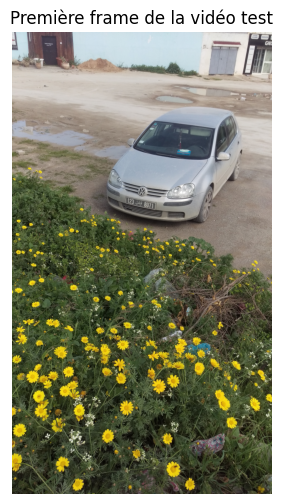

In [59]:
print(" CRÉATION D'UNE VIDÉO DE TEST")
print("="*50)

import matplotlib.pyplot as plt
import cv2
from pathlib import Path

video_dir = Path(r"C:\Users\PC\Documents\Projet\test_videos")
video_dir.mkdir(parents=True, exist_ok=True)

test_images_dir = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test")
image_files = sorted(list(test_images_dir.glob("*.jpg")))[:30]

print(f" Sélection de {len(image_files)} images pour la vidéo test...")

if image_files:
    sample = cv2.imread(str(image_files[0]))
    height, width = sample.shape[:2]

    video_path = video_dir / "test_video.mp4"
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    fps = 5

    out = cv2.VideoWriter(str(video_path), fourcc, fps, (width, height))

    for i, img_path in enumerate(image_files):
        img = cv2.imread(str(img_path))
        out.write(img)
        if i % 10 == 0:
            print(f"  Ajout image {i+1}/{len(image_files)}")

    out.release()

    print(f"\n Vidéo créée : {video_path}")
    print(f"    Résolution : {width}x{height}")
    print(f"     FPS : {fps}")
    print(f"     Durée : {len(image_files)/fps:.1f} secondes")

    print("\n Aperçu de la première frame :")
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(sample, cv2.COLOR_BGR2RGB))
    plt.title("Première frame de la vidéo test")
    plt.axis("off")
    plt.show()
else:
    print(" Aucune image trouvée dans le dossier test :", test_images_dir)

# **CHARGEMENT DU MODÈLE YOLO ENTRAÎNÉ**

In [60]:
print("\n CHARGEMENT DU MODÈLE YOLO ENTRAÎNÉ")
print("="*50)

from ultralytics import YOLO
from pathlib import Path
import os

runs_dir = Path(r"C:\Users\PC\Documents\Projet\runs\detect")
model_files = list(runs_dir.glob("*/weights/best.pt"))

if model_files:
    model_files.sort(key=lambda p: p.stat().st_mtime, reverse=True)
    model_path = model_files[0]

    print(f" Modèle trouvé : {model_path}")

    model = YOLO(str(model_path))

    print(" Test rapide du modèle sur une image...")
    if "image_files" in locals() and len(image_files) > 0:
        test_img = str(image_files[0])
    else:
        test_dir = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test")
        imgs = list(test_dir.glob("*.jpg")) + list(test_dir.glob("*.png")) + list(test_dir.glob("*.jpeg"))
        test_img = str(imgs[0]) if imgs else ""

    if test_img and os.path.exists(test_img):
        results = model(test_img, conf=0.5)
        print(f" {0 if results[0].boxes is None else len(results[0].boxes)} plaque(s) détectée(s)")
        results[0].show()
        print(" Modèle chargé avec succès !")
    else:
        print(" Image de test non trouvée, mais modèle chargé")
else:
    print(" Aucun modèle trouvé !")
    print("Vérifie le dossier:", runs_dir)
    print("Sous-dossiers:", [p.name for p in runs_dir.glob("*") if p.is_dir()])



 CHARGEMENT DU MODÈLE YOLO ENTRAÎNÉ
 Modèle trouvé : C:\Users\PC\Documents\Projet\runs\detect\tunisian_plates_training5\weights\best.pt
 Test rapide du modèle sur une image...

image 1/1 C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test\0.jpg: 640x384 (no detections), 145.8ms
Speed: 4.4ms preprocess, 145.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)
 0 plaque(s) détectée(s)
 Modèle chargé avec succès !


# **Détection sur vidéo**

In [67]:
print("\n DÉTECTION SUR VIDÉO - PIPELINE COMPLET")
print("="*50)

import os
import cv2
from pathlib import Path
from tqdm import tqdm

def detect_plates_in_video(video_input_path, video_output_path, conf_threshold=0.10, imgsz=1280, iou=0.5):
    print(f" Traitement de la vidéo :")
    print(f"    Entrée : {video_input_path}")
    print(f"    Sortie : {video_output_path}")

    cap = cv2.VideoCapture(str(video_input_path))
    if not cap.isOpened():
        print(f" Impossible d'ouvrir la vidéo : {video_input_path}")
        return

    fps = cap.get(cv2.CAP_PROP_FPS)
    fps = int(fps) if fps and fps > 0 else 5
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    print(f"\n Propriétés de la vidéo :")
    print(f"    Résolution : {width}x{height}")
    print(f"    FPS : {fps}")
    print(f"    Total frames : {total_frames}")
    if fps > 0 and total_frames > 0:
        print(f"    Durée estimée : {total_frames/fps:.1f} secondes")

    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(str(video_output_path), fourcc, fps, (width, height))

    print(f"\n Traitement en cours... (conf={conf_threshold}, imgsz={imgsz}, iou={iou})")

    frame_count = 0
    total_plates_detected = 0

    pbar = tqdm(total=total_frames if total_frames > 0 else None, desc="Processing frames")

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        results = model.predict(
            source=frame,
            conf=conf_threshold,
            imgsz=imgsz,
            iou=iou,
            verbose=False
        )

        plates_in_frame = 0
        if results and results[0].boxes is not None and len(results[0].boxes) > 0:
            for box in results[0].boxes:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                confidence = float(box.conf[0].cpu().numpy())

                x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

                color = (0, 255, 0)
                thickness = 3
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

                label = f"Plaque: {confidence:.2f}"
                font = cv2.FONT_HERSHEY_SIMPLEX
                font_scale = 0.7
                font_thickness = 2
                text_size = cv2.getTextSize(label, font, font_scale, font_thickness)[0]

                cv2.rectangle(
                    frame,
                    (x1, max(0, y1 - text_size[1] - 10)),
                    (x1 + text_size[0], y1),
                    color,
                    -1
                )

                cv2.putText(
                    frame,
                    label,
                    (x1, max(0, y1 - 5)),
                    font,
                    font_scale,
                    (0, 0, 0),
                    font_thickness
                )

                plates_in_frame += 1

            total_plates_detected += plates_in_frame

        info_y = 40
        cv2.putText(frame, f"Frame: {frame_count}/{total_frames if total_frames>0 else '?'}",
                    (20, info_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame, f"Plaques: {total_plates_detected} ({plates_in_frame} cette frame)",
                    (20, info_y + 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
        cv2.putText(frame, f"conf={conf_threshold} imgsz={imgsz}",
                    (20, info_y + 80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        out.write(frame)

        frame_count += 1
        if total_frames > 0:
            pbar.update(1)

    pbar.close()
    cap.release()
    out.release()
    cv2.destroyAllWindows()

    print(f"\n TRAITEMENT TERMINÉ !")
    print(f"    Frames traitées : {frame_count}")
    print(f"    Plaques détectées total : {total_plates_detected}")
    if frame_count > 0:
        print(f"    Moyenne par frame : {total_plates_detected/frame_count:.2f}")
    print(f"    Vidéo sauvegardée : {video_output_path}")

    return str(video_output_path), total_plates_detected

if "video_path" in locals() and video_path and Path(video_path).exists():
    output_video = Path(r"C:\Users\PC\Documents\Projet\test_videos") / "output_with_detection.mp4"
    output_video.parent.mkdir(parents=True, exist_ok=True)

    processed_video, plates_count = detect_plates_in_video(
        video_input_path=Path(video_path),
        video_output_path=output_video,
        conf_threshold=0.10,
        imgsz=1280,
        iou=0.5
    )
else:
    print(" Créez d'abord la vidéo test avec l'Étape 1")


 DÉTECTION SUR VIDÉO - PIPELINE COMPLET
 Traitement de la vidéo :
    Entrée : C:\Users\PC\Documents\Projet\test_videos\test_video.mp4
    Sortie : C:\Users\PC\Documents\Projet\test_videos\output_with_detection.mp4

 Propriétés de la vidéo :
    Résolution : 3024x5376
    FPS : 5
    Total frames : 3
    Durée estimée : 0.6 secondes

 Traitement en cours... (conf=0.1, imgsz=1280, iou=0.5)


Processing frames: 100%|██████████| 3/3 [00:03<00:00,  1.11s/it]



 TRAITEMENT TERMINÉ !
    Frames traitées : 3
    Plaques détectées total : 3
    Moyenne par frame : 1.00
    Vidéo sauvegardée : C:\Users\PC\Documents\Projet\test_videos\output_with_detection.mp4


In [64]:
from pathlib import Path
from ultralytics import YOLO
import torch

model = YOLO(r"C:\Users\PC\Documents\Projet\runs\detect\tunisian_plates_training5\weights\best.pt")

test_dir = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test")
imgs = sorted(list(test_dir.glob("*.jpg")))[:10]

for p in imgs:
    r = model.predict(source=str(p), conf=0.10, imgsz=1280, verbose=False)
    n = 0 if r[0].boxes is None else len(r[0].boxes)
    print(p.name, "->", n)


0.jpg -> 1
1.jpg -> 1
10.jpg -> 0
100.jpg -> 2
101.jpg -> 1
102.jpg -> 3
103.jpg -> 3
104.jpg -> 3
105.jpg -> 1
106.jpg -> 1


Results saved to C:\Users\PC\Documents\Projet\runs\detect\test_conf010_imgsz1280
Détections: 1


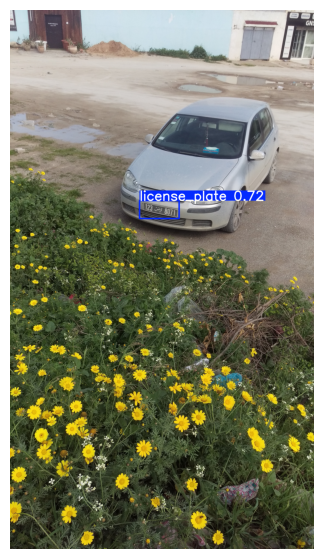

In [65]:
from ultralytics import YOLO
from pathlib import Path
import cv2
import matplotlib.pyplot as plt

model = YOLO(r"C:\Users\PC\Documents\Projet\runs\detect\tunisian_plates_training5\weights\best.pt")

img_path = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct\images\test\0.jpg")

results = model.predict(
    source=str(img_path),
    conf=0.10,
    imgsz=1280,
    iou=0.5,
    save=True,
    project=r"C:\Users\PC\Documents\Projet\runs\detect",
    name="test_conf010_imgsz1280",
    verbose=False
)

n = 0 if results[0].boxes is None else len(results[0].boxes)
print("Détections:", n)

img_annot = results[0].plot()
plt.figure(figsize=(10, 7))
plt.imshow(cv2.cvtColor(img_annot, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [68]:
print("\n🎥 TEST FINAL SUR LA VIDÉO")
print("="*50)

import os
from pathlib import Path
import glob

video_path = Path(r"C:\Users\PC\Documents\Projet\test_videos\test_video.mp4")
print(f"Vidéo source : {video_path}")
print(f"Vidéo existe : {video_path.exists()}")

if video_path.exists():
    results = model.predict(
        source=str(video_path),
        conf=0.10,
        imgsz=1280,
        iou=0.5,
        save=True,
        save_txt=True,
        project=r"C:\Users\PC\Documents\Projet\runs\detect",
        name="video_final_test",
        exist_ok=True
    )

    print(f"\n Détection vidéo terminée !")

    processed_videos = glob.glob(r"C:\Users\PC\Documents\Projet\runs\detect\video_final_test\*.mp4")
    if processed_videos:
        processed_video = processed_videos[0]
        print(f" Vidéo traitée : {processed_video}")

        size_mb = os.path.getsize(processed_video) / (1024 * 1024)
        print(f"   Taille : {size_mb:.1f} MB")
    else:
        print(" Aucune vidéo générée - essayez avec conf=0.05")
else:
    print(" La vidéo n'existe pas ! Créez-la d'abord.")



🎥 TEST FINAL SUR LA VIDÉO
Vidéo source : C:\Users\PC\Documents\Projet\test_videos\test_video.mp4
Vidéo existe : True
WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test
3 labels saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test\labels

 Détection vidéo terminée !
 Aucune vidéo générée - essayez avec conf=0.05


# **Visualiser le résultat**

In [71]:
from pathlib import Path
import cv2

print("\n🎥 EXPORT VIDÉO ANNOTÉE (FIABLE WINDOWS)")
print("="*50)

video_in  = Path(r"C:\Users\PC\Documents\Projet\test_videos\test_video.mp4")
video_out = Path(r"C:\Users\PC\Documents\Projet\test_videos\test_video_annotated.mp4")

print("Input :", video_in, "exists:", video_in.exists())
if not video_in.exists():
    raise FileNotFoundError(str(video_in))

cap = cv2.VideoCapture(str(video_in))
if not cap.isOpened():
    raise RuntimeError("Impossible d'ouvrir la vidéo d'entrée")

fps = cap.get(cv2.CAP_PROP_FPS)
fps = int(fps) if fps and fps > 0 else 5
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(str(video_out), fourcc, fps, (w, h))
if not out.isOpened():
    cap.release()
    raise RuntimeError("Impossible de créer la vidéo de sortie (codec mp4v)")

frame_count = 0
written = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    r = model.predict(source=frame, conf=0.10, imgsz=1280, iou=0.5, verbose=False)
    annotated = r[0].plot()

    out.write(annotated)
    written += 1
    frame_count += 1

cap.release()
out.release()

print("Frames lues:", frame_count)
print("Frames écrites:", written)
print("Output:", video_out, "size(MB):", video_out.stat().st_size / (1024*1024))


🎥 EXPORT VIDÉO ANNOTÉE (FIABLE WINDOWS)
Input : C:\Users\PC\Documents\Projet\test_videos\test_video.mp4 exists: True
Results saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test
4 labels saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test\labels
Results saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test
4 labels saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test\labels
Results saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test
4 labels saved to C:\Users\PC\Documents\Projet\runs\detect\video_final_test\labels
Frames lues: 3
Frames écrites: 3
Output: C:\Users\PC\Documents\Projet\test_videos\test_video_annotated.mp4 size(MB): 4.328768730163574


In [ ]:
import cv2
from pathlib import Path
# vérifie que ta vidéo sortie est lisible 

p = Path(r"C:\Users\PC\Documents\Projet\test_videos\test_video_annotated.mp4")
cap = cv2.VideoCapture(str(p))
print("Opened:", cap.isOpened())
print("Frames:", int(cap.get(cv2.CAP_PROP_FRAME_COUNT)))
cap.release()


Opened: True
Frames: 3


# **Téléverser depuis ordinateur**

In [73]:
print(" TÉLÉVERSEMENT DE VOTRE VIDÉO")
print("="*50)

import shutil
from pathlib import Path

src = Path(input("Chemin complet de la vidéo (ex: C:\\Users\\PC\\Desktop\\video.mp4): ").strip('"').strip())

dst_dir = Path(r"C:\Users\PC\Documents\Projet\user_videos")
dst_dir.mkdir(parents=True, exist_ok=True)

if not src.exists():
    raise FileNotFoundError(f"Fichier introuvable: {src}")

dst = dst_dir / src.name
shutil.copy2(src, dst)

print(f"\n Vidéo copiée : {dst}")
print(f"   Taille : {dst.stat().st_size / (1024*1024):.1f} MB")


 TÉLÉVERSEMENT DE VOTRE VIDÉO


KeyboardInterrupt: Interrupted by user

# **DÉTECTER LES PLAQUES SUR VIDÉO**

In [75]:
print("\n DÉTECTION DE PLAQUES SUR VOTRE VIDÉO")
print("="*50)

from ultralytics import YOLO
from pathlib import Path
import cv2

runs_detect = Path(r"C:\Users\PC\Documents\Projet\runs\detect")
best_list = sorted(runs_detect.glob(r"**\weights\best.pt"), key=lambda p: p.stat().st_mtime, reverse=True)

if not best_list:
    raise FileNotFoundError(f"Aucun best.pt trouvé dans: {runs_detect}")

model_path = best_list[0]
model = YOLO(str(model_path))

if "user_video_path" in locals():
    user_video_path = Path(user_video_path)
else:
    user_video_path = Path(r"C:\Users\PC\Documents\Projet\user_videos\video.mp4")

if not user_video_path.exists():
    raise FileNotFoundError(f"Vidéo introuvable: {user_video_path}")

print(f" Modèle chargé : {model_path}")
print(f"   Vidéo à analyser : {user_video_path}")

conf_threshold = 0.10
imgsz = 960
iou = 0.5

out_dir = runs_detect / "ma_video_resultat"
out_dir.mkdir(parents=True, exist_ok=True)
out_video = out_dir / (user_video_path.stem + "_annotated.mp4")

cap = cv2.VideoCapture(str(user_video_path))
if not cap.isOpened():
    raise RuntimeError(f"Impossible d'ouvrir la vidéo: {user_video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
fps = int(fps) if fps and fps > 0 else 5
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
writer = cv2.VideoWriter(str(out_video), fourcc, fps, (w, h))
if not writer.isOpened():
    cap.release()
    raise RuntimeError("Impossible de créer la vidéo de sortie")

total_detections = 0
frames_analyzed = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    r = model.predict(source=frame, conf=conf_threshold, imgsz=imgsz, iou=iou, verbose=False)
    boxes = r[0].boxes
    n = 0 if boxes is None else len(boxes)
    total_detections += n

    annotated = r[0].plot()
    writer.write(annotated)

    frames_analyzed += 1

cap.release()
writer.release()

print("\n Détection terminée !")
print("\n STATISTIQUES DE DÉTECTION :")
print("-" * 40)
print(f" Modèle utilisé : {model_path}")
print(f" Détections totales : {total_detections}")
print(f" Frames analysées : {frames_analyzed}")
if frames_analyzed > 0:
    print(f" Moyenne detections/frame : {total_detections / frames_analyzed:.2f}")
print("\n Vidéo annotée sauvegardée :", out_video)
print(" Taille (MB) :", out_video.stat().st_size / (1024 * 1024))


 DÉTECTION DE PLAQUES SUR VOTRE VIDÉO


FileNotFoundError: Vidéo introuvable: C:\Users\PC\Documents\Projet\user_videos\video.mp4

# **vérifions les détections en détail **

In [76]:
from pathlib import Path
import cv2
from ultralytics import YOLO

print("\n DÉTECTION DE PLAQUES SUR VOTRE VIDÉO")
print("="*50)

runs_detect = Path(r"C:\Users\PC\Documents\Projet\runs\detect")
best_list = sorted(runs_detect.glob(r"**\weights\best.pt"), key=lambda p: p.stat().st_mtime, reverse=True)
if not best_list:
    raise FileNotFoundError(f"Aucun best.pt trouvé dans: {runs_detect}")

model_path = best_list[0]
model = YOLO(str(model_path))

user_dir = Path(r"C:\Users\PC\Documents\Projet\user_videos")
user_dir.mkdir(parents=True, exist_ok=True)

cands = []
for ext in ("*.mp4", "*.avi", "*.mov", "*.mkv", "*.wmv"):
    cands += sorted(user_dir.glob(ext), key=lambda p: p.stat().st_mtime, reverse=True)

if not cands:
    print("Aucune vidéo trouvée dans :", user_dir)
    print("Mets ta vidéo dans ce dossier OU remplace user_video_path par le vrai chemin.")
    raise FileNotFoundError(str(user_dir))

user_video_path = cands[0]

print(f" Modèle chargé : {model_path}")
print(f"   Vidéo à analyser : {user_video_path}")

conf_threshold = 0.10
imgsz = 960
iou = 0.5

out_dir = runs_detect / "ma_video_resultat"
out_dir.mkdir(parents=True, exist_ok=True)
out_video = out_dir / (user_video_path.stem + "_annotated.mp4")

cap = cv2.VideoCapture(str(user_video_path))
if not cap.isOpened():
    raise RuntimeError(f"Impossible d'ouvrir la vidéo: {user_video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
fps = int(fps) if fps and fps > 0 else 5
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*"mp4v")
writer = cv2.VideoWriter(str(out_video), fourcc, fps, (w, h))
if not writer.isOpened():
    cap.release()
    raise RuntimeError("Impossible de créer la vidéo de sortie")

total_detections = 0
frames_analyzed = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    r = model.predict(source=frame, conf=conf_threshold, imgsz=imgsz, iou=iou, verbose=False)
    boxes = r[0].boxes
    total_detections += 0 if boxes is None else len(boxes)

    writer.write(r[0].plot())
    frames_analyzed += 1

cap.release()
writer.release()

print("\n Détection terminée !")
print(f" Frames analysées : {frames_analyzed}")
print(f" Détections totales : {total_detections}")
print(" Vidéo annotée :", out_video)
print(" Taille (MB) :", out_video.stat().st_size / (1024 * 1024))


 DÉTECTION DE PLAQUES SUR VOTRE VIDÉO
Aucune vidéo trouvée dans : C:\Users\PC\Documents\Projet\user_videos
Mets ta vidéo dans ce dossier OU remplace user_video_path par le vrai chemin.


FileNotFoundError: C:\Users\PC\Documents\Projet\user_videos

# **TROUVER ET VISUALISER LA VIDÉO RÉSULTAT**


 VISUALISATION FRAME PAR FRAME (SEUIL PLUS BAS + TOP1)


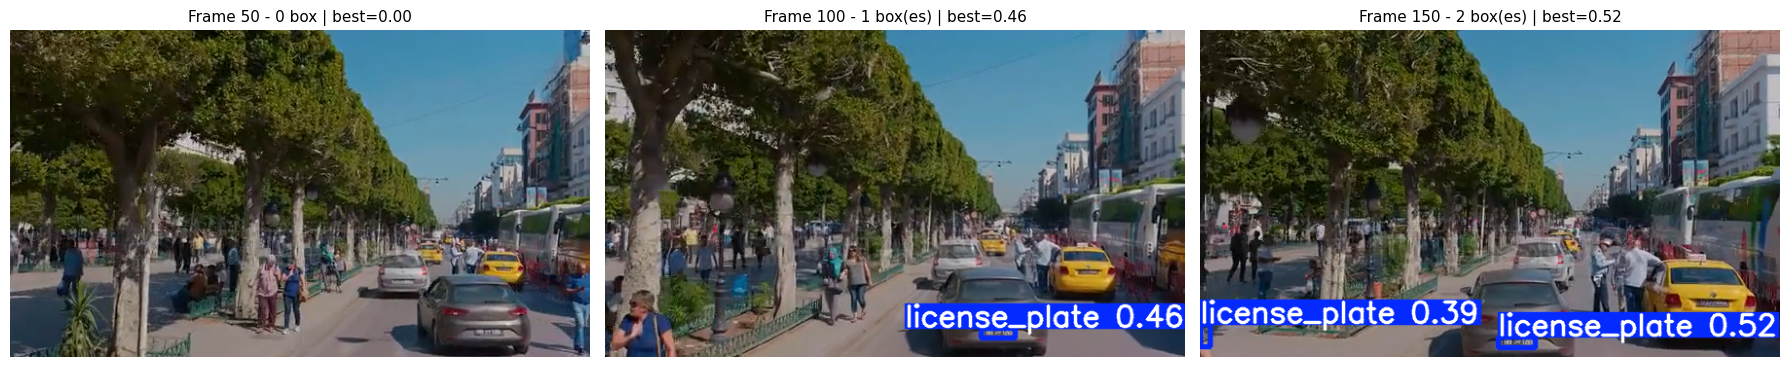

In [96]:
print("\n VISUALISATION FRAME PAR FRAME (SEUIL PLUS BAS + TOP1)")
print("="*50)

from pathlib import Path
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

runs_detect = Path(r"C:\Users\PC\Documents\Projet\runs\detect")
best_list = sorted(runs_detect.glob(r"**\weights\best.pt"), key=lambda p: p.stat().st_mtime, reverse=True)
if not best_list:
    raise FileNotFoundError(f"Aucun best.pt trouvé dans: {runs_detect}")

model = YOLO(str(best_list[0]))

user_dir = Path(r"C:\Users\PC\Documents\Projet\user_videos")
videos = []
for ext in ("*.mp4", "*.avi", "*.mov", "*.mkv", "*.wmv"):
    videos += sorted(user_dir.glob(ext), key=lambda p: p.stat().st_mtime, reverse=True)
if not videos:
    raise FileNotFoundError(f"Aucune vidéo trouvée dans: {user_dir}")
video_path = videos[0]

def visualize_frames(video_path, frames_idx, conf=0.05, imgsz=1280, iou=0.5):
    cap = cv2.VideoCapture(str(video_path))
    if not cap.isOpened():
        raise RuntimeError(f"Impossible d'ouvrir la vidéo: {video_path}")

    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames_idx = [f for f in frames_idx if 0 <= f < total_frames]
    if not frames_idx:
        raise ValueError("Aucune frame valide dans frames_idx")

    cols = 3
    rows = (len(frames_idx) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(18, 6 * rows))
    axes = axes.flatten() if hasattr(axes, "flatten") else [axes]

    for i, idx in enumerate(frames_idx):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if not ret:
            axes[i].set_title(f"Frame {idx} - lecture impossible")
            axes[i].axis("off")
            continue

        r = model.predict(source=frame, conf=conf, imgsz=imgsz, iou=iou, verbose=False)[0]
        boxes = r.boxes

        if boxes is not None and len(boxes) > 0:
            best_conf = float(boxes.conf.max().item())
            annotated = r.plot(line_width=3)
            title = f"Frame {idx} - {len(boxes)} box(es) | best={best_conf:.2f}"
        else:
            annotated = frame
            title = f"Frame {idx} - 0 box | best=0.00"

        axes[i].imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
        axes[i].set_title(title, fontsize=11)
        axes[i].axis("off")

    for k in range(i + 1, len(axes)):
        axes[k].axis("off")

    cap.release()
    plt.tight_layout()
    plt.show()

visualize_frames(video_path, frames_idx=[50, 100, 150], conf=0.05, imgsz=1280, iou=0.5)

# **Interface Gradio**

In [81]:
!pip install "numpy<2" "pandas<2.0"

In [ ]:
def detect_on_image(image_bytes, confidence=0.2):
    """Détecte les plaques sur une image - VERSION"""
    try:
        print(f" Analyse d'image avec confiance: {confidence}")

        # Convertir bytes en image
        nparr = np.frombuffer(image_bytes, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        if img is None:
            print(" Image invalide")
            return None, {"error": "Image invalide"}

        print(f" Taille de l'image: {img.shape}")

        # Détection AVEC VISUALISATION
        # IMPORTANT: Utiliser 'verbose=False' et récupérer le premier résultat
        results = model(img, conf=confidence, verbose=False)

        if len(results) > 0 and len(results[0].boxes) > 0:
            print(f" {len(results[0].boxes)} plaque(s) détectée(s)")

            # MÉTHODE 1: Utiliser .plot() pour dessiner les boîtes
            annotated_img = results[0].plot(
                line_width=2,
                font_size=0.7,
                conf=True,
                labels=True
            )

            # Convertir BGR → RGB pour Gradio
            annotated_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

            # Statistiques
            boxes = results[0].boxes
            confidences = [box.conf.item() for box in boxes]
            avg_confidence = np.mean(confidences) if confidences else 0

            stats = {
                "détections": len(boxes),
                "confiance_moyenne": f"{avg_confidence:.2%}",
                "confiances": [f"{c:.2%}" for c in confidences],
                "type": "image",
                "succès": True
            }

            print(f" Statistiques: {stats}")
            return annotated_rgb, stats

        else:
            print("  Aucune plaque détectée")
            # Retourner l'image originale en RGB
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img_rgb, {
                "détections": 0,
                "message": "Aucune plaque détectée",
                "conseil": "Baissez le seuil de confiance à 0.1",
                "succès": False
            }

    except Exception as e:
        print(f" Erreur dans detect_on_image: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, {"error": str(e)}

In [87]:
pip install -U ultralytics gradio opencv-python numpy

  Using cached gradio-6.2.0-py3-none-any.whl.metadata (16 kB)
  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.0-cp312-cp312-win_amd64.whl.metadata (6.6 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached brotli-1.2.0-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached ffmpy-1.0.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-2.0.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached huggingface_hub-1.2.3-py3-none-any.whl.metadata (13 kB)
  Using cached orjson-3.11.5-cp312-cp312-win_amd64.whl.metadata (42 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.21-py3-none-any.whl.metadata (1.8 kB)
  Using cached safehttpx-0.1.7-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached tomlkit-0.13

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataset-tools 0.1.9 requires numpy<2.0.0,>=1.19, but you have numpy 2.2.6 which is incompatible.
supervisely 6.73.493 requires python-multipart<=0.0.12,>=0.0.5, but you have python-multipart 0.0.21 which is incompatible.


In [97]:
from pathlib import Path

base = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct")

img_train = list((base/"images/train").glob("*.jpg"))
img_val   = list((base/"images/test").glob("*.jpg"))
lab_train = list((base/"labels/train").glob("*.txt"))
lab_val   = list((base/"labels/test").glob("*.txt"))

print("train images:", len(img_train))
print("val/test images:", len(img_val))
print("train labels:", len(lab_train))
print("val/test labels:", len(lab_val))

train images: 567
val/test images: 142
train labels: 567
val/test labels: 142


In [98]:
import json, shutil
from pathlib import Path
import cv2

src = Path(r"C:\Users\PC\Documents\Projet\data\tunisian-licensed-plates")
dst = Path(r"C:\Users\PC\Documents\Projet\data\yolo_tunisian_correct")

for p in [dst/"images/train", dst/"images/test", dst/"labels/train", dst/"labels/test"]:
    p.mkdir(parents=True, exist_ok=True)

def convert_split(split_name):
    img_dir = src/split_name/"img"
    ann_dir = src/split_name/"ann"

    out_img_dir = dst/"images"/("train" if split_name=="train" else "test")
    out_lab_dir = dst/"labels"/("train" if split_name=="train" else "test")

    imgs = sorted(list(img_dir.glob("*.jpg")))
    n_ok = 0

    for img_path in imgs:
        ann_path = ann_dir/(img_path.name + ".json")  # ex: 142.jpg.json
        if not ann_path.exists():
            continue

        im = cv2.imread(str(img_path))
        if im is None:
            continue
        h, w = im.shape[:2]

        data = json.loads(ann_path.read_text(encoding="utf-8"))
        objects = data.get("objects", [])

        lines = []
        for obj in objects:
            pts = obj.get("points", {}).get("exterior", [])
            if len(pts) != 2:
                continue
            (x1, y1), (x2, y2) = pts
            x1, x2 = sorted([float(x1), float(x2)])
            y1, y2 = sorted([float(y1), float(y2)])

            x1 = max(0.0, min(x1, w - 1.0))
            x2 = max(0.0, min(x2, w - 1.0))
            y1 = max(0.0, min(y1, h - 1.0))
            y2 = max(0.0, min(y2, h - 1.0))

            bw = (x2 - x1) / w
            bh = (y2 - y1) / h
            xc = ((x1 + x2) / 2.0) / w
            yc = ((y1 + y2) / 2.0) / h

            if bw <= 0 or bh <= 0:
                continue

            lines.append(f"0 {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}")

        shutil.copy2(img_path, out_img_dir/img_path.name)
        (out_lab_dir/(img_path.stem + ".txt")).write_text("\n".join(lines) + ("\n" if lines else ""), encoding="utf-8")
        n_ok += 1

    print(split_name, "images copiées:", n_ok)

convert_split("train")
convert_split("test")

train images copiées: 567
test images copiées: 142


In [100]:
import os
import cv2
import glob
import numpy as np
import gradio as gr
from pathlib import Path
from datetime import datetime
from ultralytics import YOLO

# ---------- CONFIG ----------
PROJECT_DIR = Path(r"C:\Users\PC\Documents\Projet")
RUNS_DIR = PROJECT_DIR / "runs" / "detect"
RESULTS_DIR = PROJECT_DIR / "gradio_results"
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

# 1) Charger automatiquement le dernier best.pt si MODEL_PATH n'existe pas
MODEL_PATH = RUNS_DIR / "tunisian_plates_training5" / "weights" / "best.pt"

if not MODEL_PATH.exists():
    best_list = sorted(RUNS_DIR.glob(r"**\weights\best.pt"), key=lambda p: p.stat().st_mtime, reverse=True)
    if not best_list:
        raise FileNotFoundError(f"Aucun best.pt trouvé dans: {RUNS_DIR}")
    MODEL_PATH = best_list[0]

model = YOLO(str(MODEL_PATH))
CLASS_NAMES = model.names

# ---------- UTILS ----------
def _ensure_bgr(img_rgb: np.ndarray) -> np.ndarray:
    if img_rgb is None:
        return None
    if len(img_rgb.shape) == 2:
        return cv2.cvtColor(img_rgb, cv2.COLOR_GRAY2BGR)
    return cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

def _find_output_video(folder: Path):
    candidates = []
    for ext in ("*.mp4", "*.avi", "*.mov", "*.mkv"):
        candidates += list(folder.glob(ext))
    if not candidates:
        return None
    candidates.sort(key=lambda p: p.stat().st_mtime, reverse=True)
    return candidates[0]

def _first_detection_preview(results):
    for r in results:
        if r.boxes is not None and len(r.boxes) > 0:
            img_bgr = r.plot(line_width=3)
            return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return None

# ---------- IMAGE ----------
def detect_on_image(img_rgb, confidence):
    try:
        if img_rgb is None:
            return None, {"error": "Aucune image reçue"}

        img_bgr = _ensure_bgr(img_rgb)

        res = model.predict(source=img_bgr, conf=float(confidence), verbose=False)
        r0 = res[0]

        boxes = r0.boxes
        n = 0 if boxes is None else len(boxes)

        if n > 0:
            annotated_bgr = r0.plot(line_width=3)
            annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)
            confs = [float(c) for c in boxes.conf.cpu().numpy().tolist()]

            stats = {
                "detections": n,
                "confiance_moyenne": float(np.mean(confs)),
                "confiances": [float(x) for x in confs],
                "seuil_utilise": float(confidence),
                "taille_image": f"{img_rgb.shape[1]}x{img_rgb.shape[0]}",
                "modele": str(MODEL_PATH),
                "classes": CLASS_NAMES,
            }
            return annotated_rgb, stats
        else:
            stats = {
                "detections": 0,
                "seuil_utilise": float(confidence),
                "conseil": "Baisse conf (ex 0.05) et/ou augmente imgsz pendant l'inférence si la plaque est petite.",
                "modele": str(MODEL_PATH),
            }
            return img_rgb, stats

    except Exception as e:
        return None, {"error": str(e)}

# ---------- VIDEO ----------
def detect_on_video(video_path, confidence):
    try:
        if not video_path:
            return None, None, {"error": "Aucune vidéo reçue"}

        video_path = Path(video_path)
        if not video_path.exists():
            return None, None, {"error": f"Vidéo introuvable: {video_path}"}

        session_id = datetime.now().strftime("%Y%m%d_%H%M%S")
        out_project = RESULTS_DIR
        out_name = f"video_{session_id}"

        results = model.predict(
            source=str(video_path),
            conf=float(confidence),
            save=True,
            save_txt=True,
            project=str(out_project),
            name=out_name,
            exist_ok=True,
            verbose=False
        )

        out_folder = out_project / out_name
        out_video = _find_output_video(out_folder)

        total_frames = len(results)
        total_detections = sum(0 if r.boxes is None else len(r.boxes) for r in results)

        preview = _first_detection_preview(results)

        stats = {
            "detections_total": int(total_detections),
            "frames_total": int(total_frames),
            "moyenne_par_frame": float(total_detections / max(total_frames, 1)),
            "seuil_utilise": float(confidence),
            "sortie_dossier": str(out_folder),
            "modele": str(MODEL_PATH),
        }

        if out_video is None:
            stats["warning"] = "Aucun fichier vidéo exporté par YOLO (regarde le dossier de sortie)."
            return None, preview, stats

        return str(out_video), preview, stats

    except Exception as e:
        return None, None, {"error": str(e)}

# ---------- UI ----------
with gr.Blocks(title="Détection Plaques (YOLO) - Local Windows", theme=gr.themes.Soft()) as demo:
    gr.Markdown("# 🚘 Détecteur de Plaques (YOLO) — Local Windows")
    gr.Markdown(f"**Modèle chargé :** `{MODEL_PATH}`")

    with gr.Tabs():
        with gr.Tab("🖼️ Image"):
            with gr.Row():
                with gr.Column(scale=1):
                    img_input = gr.Image(label="Téléverser une image", type="numpy")
                    img_conf = gr.Slider(0.01, 0.8, value=0.10, step=0.01, label="Seuil de confiance")
                    img_btn = gr.Button("Détecter", variant="primary")
                with gr.Column(scale=2):
                    img_output = gr.Image(label="Résultat (boîtes + confiance)")
                    img_stats = gr.JSON(label="Stats")

            img_btn.click(detect_on_image, inputs=[img_input, img_conf], outputs=[img_output, img_stats])

        with gr.Tab("🎥 Vidéo"):
            with gr.Row():
                with gr.Column(scale=1):
                    vid_input = gr.Video(label="Téléverser une vidéo", format="mp4")
                    vid_conf = gr.Slider(0.01, 0.8, value=0.15, step=0.01, label="Seuil de confiance")
                    vid_btn = gr.Button("Analyser la vidéo", variant="primary")
                with gr.Column(scale=2):
                    vid_output = gr.Video(label="Vidéo annotée (sortie)")
                    vid_preview = gr.Image(label="Aperçu (première frame avec détection)")
                    vid_stats = gr.JSON(label="Stats vidéo")

            # Gradio Video renvoie un dict, on récupère le chemin
            def _video_adapter(video_obj, conf):
                path = None
                if isinstance(video_obj, dict):
                    path = video_obj.get("path", None)
                elif isinstance(video_obj, str):
                    path = video_obj
                return detect_on_video(path, conf)

            vid_btn.click(_video_adapter, inputs=[vid_input, vid_conf], outputs=[vid_output, vid_preview, vid_stats])

demo.launch(server_name="127.0.0.1", server_port=7861, inbrowser=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_14476\2904688294.py:145: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  with gr.Blocks(title="Détection Plaques (YOLO) - Local Windows", theme=gr.themes.Soft()) as demo:


* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


# **ROADMAP COMPLÈTE POUR L'OCR DES PLAQUES**

**CRÉER UN MODÈLE DE CLASSIFICATION POUR CARACTÈRES**

In [107]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from pathlib import Path

print("\n" + "=" * 70)
print("CRÉATION DU MODÈLE DE CLASSIFICATION (LOCAL WINDOWS)")
print("=" * 70)

# ====== CONFIG (change فقط هذا المسار) ======
classes_path = Path(r"C:\Users\PC\Documents\Projet\data\classes")  # <-- عدّل للمسار متاعك
save_dir = Path(r"C:\Users\PC\Documents\Projet\models")
save_dir.mkdir(parents=True, exist_ok=True)

# 1) Charger et préparer les données
def load_dataset(data_path: Path, img_size=(64, 64), max_per_class=100):
    X, y = [], []
    class_names = []
    class_to_idx = {}

    classes = sorted([d.name for d in data_path.iterdir() if d.is_dir()])

    for idx, class_name in enumerate(classes):
        class_path = data_path / class_name
        class_to_idx[class_name] = idx
        class_names.append(class_name)

        images = sorted([p for p in class_path.iterdir()
                         if p.suffix.lower() in [".jpg", ".jpeg", ".png"]])

        for img_path in images[:max_per_class]:
            img = cv2.imread(str(img_path))
            if img is None:
                continue
            img_resized = cv2.resize(img, img_size, interpolation=cv2.INTER_AREA)
            img_normalized = img_resized.astype(np.float32) / 255.0
            X.append(img_normalized)
            y.append(idx)

    X = np.array(X, dtype=np.float32)
    y = np.array(y, dtype=np.int64)
    return X, y, class_names, class_to_idx

print("📥 Chargement du dataset...")
if not classes_path.exists():
    raise FileNotFoundError(f"classes_path introuvable: {classes_path}")

X, y, class_names, class_to_idx = load_dataset(classes_path, img_size=(64, 64), max_per_class=100)

print(f"✅ Dataset chargé:")
print(f"   • Images: {X.shape[0]}")
print(f"   • Taille: {X.shape[1]}x{X.shape[2]}")
print(f"   • Classes: {len(class_names)}")
print(f"   • Noms: {class_names}")

if len(class_names) < 2:
    raise ValueError("Il faut au moins 2 classes pour entraîner un classifieur.")

# 2) Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Split des données:")
print(f"   • Entraînement: {X_train.shape[0]} images")
print(f"   • Test: {X_test.shape[0]} images")

# 3) Créer le modèle CNN
def create_char_classifier(input_shape=(64, 64, 3), num_classes=27):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),

        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 4) Créer et compiler le modèle
num_classes = len(class_names)
model = create_char_classifier(input_shape=(64, 64, 3), num_classes=num_classes)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n📋 ARCHITECTURE DU MODÈLE:")
model.summary()

# 5) Callbacks
best_model_path = save_dir / "best_char_classifier.keras"

callbacks = [
    keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-5),
    keras.callbacks.ModelCheckpoint(str(best_model_path), save_best_only=True, monitor="val_accuracy")
]

print("\n🎯 PRÊT POUR L'ENTRAÎNEMENT !")
print(f"   • Classes: {num_classes}")
print(f"   • Batch size: 32")
print(f"   • Époques: 50")
print(f"   • Sauvegarde: {best_model_path}")

ModuleNotFoundError: No module named 'tensorflow'

**INSTALLATION DES BIBLIOTHÈQUES OCR**

In [32]:
"""
ÉTAPE 1 : CONFIGURATION POUR OCR ARABE
"""

print("=" * 60)
print("PRÉPARATION POUR OCR DE PLAQUES SAOUDIENNES")
print("=" * 60)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import torch
import os
from google.colab.patches import cv2_imshow

# Vérification GPU
print("\n1. VÉRIFICATION MATÉRIEL :")
print(f"   • GPU disponible : {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   • Nom du GPU : {torch.cuda.get_device_name(0)}")

# Définir les caractères autorisés
print("\n2. CARACTÈRES AUTORISÉS :")
arabic_letters = 'ابتثجحخدذرزسشصضطظعغفقكلمنهويىءآأؤئة'
numbers = '0123456789'
allowlist = numbers + arabic_letters
print(f"   • Chiffres : {numbers}")
print(f"   • Lettres arabes : {arabic_letters}")
print(f"   • Total : {len(allowlist)} caractères")

PRÉPARATION POUR OCR DE PLAQUES SAOUDIENNES

1. VÉRIFICATION MATÉRIEL :
   • GPU disponible : False

2. CARACTÈRES AUTORISÉS :
   • Chiffres : 0123456789
   • Lettres arabes : ابتثجحخدذرزسشصضطظعغفقكلمنهويىءآأؤئة
   • Total : 45 caractères


In [33]:
"""
ÉTAPE 2 : INITIALISATION EASYOCR AVEC SUPPORT ARABE
"""

print("\n" + "=" * 60)
print("INITIALISATION EASYOCR")
print("=" * 60)

try:
    # Essayer avec GPU d'abord
    print("Tentative d'initialisation avec GPU...")
    reader = easyocr.Reader(
        lang_list=['ar', 'en'],  # ARABE en premier !
        gpu=True,
        quantize=False,
        model_storage_directory='/content/models',
        download_enabled=True
    )
    print(" EasyOCR initialisé AVEC GPU (arabe + anglais)")

except Exception as e:
    print(f" GPU échoué : {str(e)[:100]}...")
    print("Passage en mode CPU...")
    reader = easyocr.Reader(
        lang_list=['ar', 'en'],
        gpu=False,
        quantize=True  # Quantification pour accélérer CPU
    )
    print(" EasyOCR initialisé en CPU (plus lent)")

WARN:easyocr.easyocr:Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



INITIALISATION EASYOCR
Tentative d'initialisation avec GPU...
 EasyOCR initialisé AVEC GPU (arabe + anglais)


**EXTRACTION DES PLAQUES DÉTECTÉES**

SYSTÈME COMPLET DE DÉTECTION ET RECONNAISSANCE DE PLAQUES

 ÉTAPE 1 : DÉTECTION DES PLAQUES AVEC YOLO
--------------------------------------------------
 Modèle chargé: /content/runs/detect/tunisian_plates_training2/weights/best.pt
 Image chargée: /content/data/yolo_tunisian_correct/images/test/0.jpg
   Dimensions: 3024x5376 pixels

   Détection en cours...

0: 640x384 1 license_plate, 143.3ms
Speed: 5.2ms preprocess, 143.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)
 1 plaque(s) détectée(s)


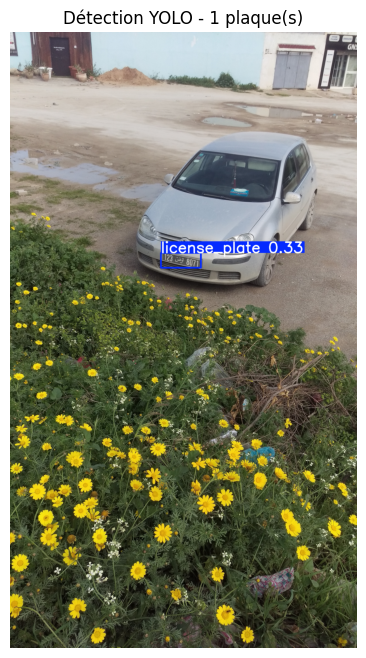


 ÉTAPE 2 : EXTRACTION DES PLAQUES DÉTECTÉES
--------------------------------------------------

   PLAQUE 1:
     • Coordonnées: [1315, 1927, 1663, 2057]
     • Taille: 348x130 px


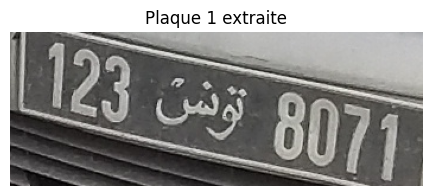

WARN:easyocr.easyocr:Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



 Total: 1 plaque(s) extraite(s)

 ÉTAPE 3 : CONFIGURATION EASYOCR
--------------------------------------------------
Caractères autorisés (45):
  • Chiffres: 0123456789
  • Lettres arabes: ابتثجحخدذرزسشصضطظعغفقكلمنهويىءآأؤئة
 EasyOCR initialisé (Arabe + Anglais, GPU activé)

  ÉTAPE 4 : PRÉTRAITEMENT OPTIMISÉ
--------------------------------------------------
 Fonction de prétraitement définie

 ÉTAPE 5 : RECONNAISSANCE OCR
--------------------------------------------------

   ANALYSE PLAQUE 1:
   ------------------------------


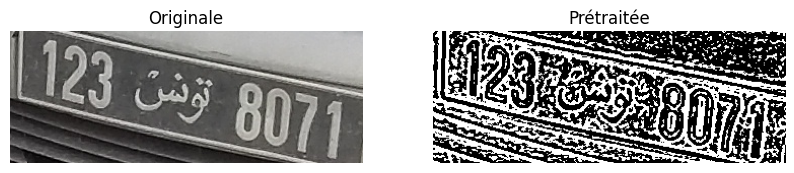

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


      Texte: 'ذخا م 8آ035500'
        Chiffres: '8035500'
        Lettres arabes: 'ذخامآ'
        Confiance: 6.9%

 ÉTAPE 6 : RÉSULTATS FINAUX
--------------------------------------------------

 SYNTHÈSE:
   • Plaques détectées: 1
   • Reconnaissances réussies: 1

    TEXTE RECONNU:
      Plaque #1: 'ذخا م 8آ035500' (6.9%)

     VISUALISATION FINALE:


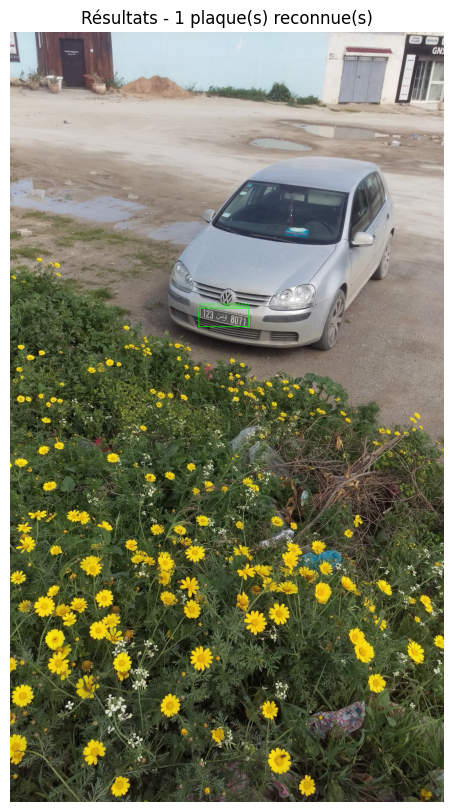


PROCESSUS TERMINÉ AVEC SUCCÈS


In [50]:
# =============== IMPORTS ===============
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import os

print("=" * 70)
print("SYSTÈME COMPLET DE DÉTECTION ET RECONNAISSANCE DE PLAQUES")
print("=" * 70)

# =============== ÉTAPE 1 : DÉTECTION YOLO ===============
print("\n ÉTAPE 1 : DÉTECTION DES PLAQUES AVEC YOLO")
print("-" * 50)

# 1. Charger le modèle YOLO
model_path = '/content/runs/detect/tunisian_plates_training2/weights/best.pt'
if os.path.exists(model_path):
    model = YOLO(model_path)
    print(f" Modèle chargé: {model_path}")
else:
    print(f" ERREUR: Modèle non trouvé à {model_path}")
    print("Vérifie le chemin du modèle!")
    # Arrêter l'exécution
    raise FileNotFoundError(f"Modèle non trouvé: {model_path}")

# 2. Charger l'image test
test_image_path = '/content/data/yolo_tunisian_correct/images/test/0.jpg'
if os.path.exists(test_image_path):
    image = cv2.imread(test_image_path)
    print(f" Image chargée: {test_image_path}")
    print(f"   Dimensions: {image.shape[1]}x{image.shape[0]} pixels")
else:
    print(f" ERREUR: Image non trouvée à {test_image_path}")
    # Chercher d'autres images
    test_folder = '/content/data/yolo_tunisian_correct/images/test/'
    if os.path.exists(test_folder):
        images = [f for f in os.listdir(test_folder) if f.endswith(('.jpg', '.png'))]
        if images:
            test_image_path = os.path.join(test_folder, images[0])
            image = cv2.imread(test_image_path)
            print(f" Image alternative chargée: {test_image_path}")
        else:
            print(" ERREUR: Aucune image dans le dossier test")
            raise FileNotFoundError("Aucune image trouvée")
    else:
        raise FileNotFoundError(f"Dossier non trouvé: {test_folder}")

# 3. Détecter les plaques
print("\n   Détection en cours...")
results = model.predict(
    source=image,
    conf=0.25,  # Seuil de confiance
    save=False
)

# 4. Afficher les résultats YOLO
if len(results[0].boxes) > 0:
    print(f" {len(results[0].boxes)} plaque(s) détectée(s)")

    # Afficher l'image avec les boîtes de détection
    img_with_boxes = results[0].plot()

    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f"Détection YOLO - {len(results[0].boxes)} plaque(s)")
    plt.axis('off')
    plt.show()

else:
    print(" Aucune plaque détectée avec conf=0.25")
    print("   Essai avec seuil plus bas (conf=0.15)...")

    results = model.predict(
        source=image,
        conf=0.15,
        save=False
    )

    if len(results[0].boxes) > 0:
        print(f" {len(results[0].boxes)} plaque(s) détectée(s) avec conf=0.15")
        img_with_boxes = results[0].plot()

        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f"Détection YOLO (conf=0.15)")
        plt.axis('off')
        plt.show()
    else:
        print(" Même avec conf=0.15: AUCUNE plaque détectée")
        print("   Le modèle ne détecte peut-être pas sur cette image")

        # Afficher l'image originale pour vérification
        plt.figure(figsize=(12, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Image originale - Y a-t-il une plaque visible?")
        plt.axis('off')
        plt.show()

        # On ne peut pas continuer sans détection
        print("\n  Impossible de continuer sans détection de plaque")
        print("   Essaie avec une autre image ou ajuste le modèle")
        # On sort du programme
        import sys
        sys.exit(1)

# =============== ÉTAPE 2 : EXTRACTION DES PLAQUES ===============
print("\n ÉTAPE 2 : EXTRACTION DES PLAQUES DÉTECTÉES")
print("-" * 50)

plaques_images = []
plaques_coordonnees = []

if len(results[0].boxes) > 0:
    for i, box in enumerate(results[0].boxes):
        # Récupérer les coordonnées
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Extraire la région de la plaque
        plaque_region = image[y1:y2, x1:x2]

        # Vérifier si la région n'est pas vide
        if plaque_region.size > 0:
            plaques_images.append(plaque_region)
            plaques_coordonnees.append((x1, y1, x2, y2))

            print(f"\n   PLAQUE {i+1}:")
            print(f"     • Coordonnées: [{x1}, {y1}, {x2}, {y2}]")
            print(f"     • Taille: {plaque_region.shape[1]}x{plaque_region.shape[0]} px")

            # Afficher la plaque extraite (seulement pour les 3 premières)
            if i < 3:
                plt.figure(figsize=(6, 2))
                plt.imshow(cv2.cvtColor(plaque_region, cv2.COLOR_BGR2RGB))
                plt.title(f"Plaque {i+1} extraite")
                plt.axis('off')
                plt.show()
        else:
            print(f"  Plaque {i+1}: région vide, ignorée")

    print(f"\n Total: {len(plaques_images)} plaque(s) extraite(s)")
else:
    print(" Aucune plaque à extraire")
    # On ne peut pas continuer
    import sys
    sys.exit(1)

# =============== ÉTAPE 3 : CONFIGURATION EASYOCR ===============
print("\n ÉTAPE 3 : CONFIGURATION EASYOCR")
print("-" * 50)

# Définir les caractères autorisés
arabic_letters = 'ابتثجحخدذرزسشصضطظعغفقكلمنهويىءآأؤئة'
numbers = '0123456789'
allowlist = numbers + arabic_letters

print(f"Caractères autorisés ({len(allowlist)}):")
print(f"  • Chiffres: {numbers}")
print(f"  • Lettres arabes: {arabic_letters}")

# Initialiser EasyOCR
try:
    reader = easyocr.Reader(['ar', 'en'], gpu=True)
    print(" EasyOCR initialisé (Arabe + Anglais, GPU activé)")
except Exception as e:
    print(f"  GPU non disponible: {str(e)[:100]}...")
    reader = easyocr.Reader(['ar', 'en'], gpu=False)
    print(" EasyOCR initialisé en mode CPU")

# =============== ÉTAPE 4 : FONCTION DE PRÉTRAITEMENT ===============
print("\n  ÉTAPE 4 : PRÉTRAITEMENT OPTIMISÉ")
print("-" * 50)

def preparer_plaque_pour_ocr(image_plaque):
    """Prépare une image de plaque pour l'OCR"""
    # 1. Convertir en niveaux de gris
    if len(image_plaque.shape) == 3:
        gray = cv2.cvtColor(image_plaque, cv2.COLOR_BGR2GRAY)
    else:
        gray = image_plaque.copy()

    # 2. Redimensionner si trop petit
    height, width = gray.shape
    if width < 100:
        new_width = 200
        new_height = int(height * (200 / width))
        gray = cv2.resize(gray, (new_width, new_height))

    # 3. Améliorer le contraste (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # 4. Réduction du bruit
    denoised = cv2.medianBlur(enhanced, 3)

    # 5. Seuillage adaptatif
    binary = cv2.adaptiveThreshold(
        denoised, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 6. Vérifier si besoin d'inverser
    white_pixels = np.sum(binary == 255)
    black_pixels = np.sum(binary == 0)

    if white_pixels > black_pixels:
        binary = cv2.bitwise_not(binary)

    # 7. Retourner en BGR pour EasyOCR
    return cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

print(" Fonction de prétraitement définie")

# =============== ÉTAPE 5 : RECONNAISSANCE OCR ===============
print("\n ÉTAPE 5 : RECONNAISSANCE OCR")
print("-" * 50)

resultats_ocr = []

if plaques_images:
    for i, plaque_img in enumerate(plaques_images):
        print(f"\n   ANALYSE PLAQUE {i+1}:")
        print("   " + "-" * 30)

        # 1. Prétraitement
        plaque_preparee = preparer_plaque_pour_ocr(plaque_img)

        # Afficher avant/après (seulement pour les 2 premières)
        if i < 2:
            fig, axes = plt.subplots(1, 2, figsize=(10, 3))
            axes[0].imshow(cv2.cvtColor(plaque_img, cv2.COLOR_BGR2RGB))
            axes[0].set_title("Originale")
            axes[0].axis('off')

            axes[1].imshow(cv2.cvtColor(plaque_preparee, cv2.COLOR_BGR2RGB))
            axes[1].set_title("Prétraitée")
            axes[1].axis('off')
            plt.show()

        # 2. OCR avec paramètres optimisés
        try:
            results = reader.readtext(
                plaque_preparee,
                allowlist=allowlist,
                paragraph=False,
                detail=1,
                width_ths=0.6,
                ycenter_ths=0.5,
                text_threshold=0.3,
                contrast_ths=0.4
            )

            # 3. Traiter les résultats
            if results:
                textes = []
                confiances = []

                for detection in results:
                    if len(detection) >= 2:
                        texte = detection[1]
                        # Nettoyer
                        texte_propre = ''.join([c for c in texte if c in allowlist])

                        if texte_propre:
                            textes.append(texte_propre)
                            if len(detection) >= 3:
                                confiances.append(detection[2])

                if textes:
                    texte_complet = ' '.join(textes)
                    chiffres = ''.join([c for c in texte_complet if c.isdigit()])
                    lettres_arabes = ''.join([c for c in texte_complet if c in arabic_letters])
                    confiance_moyenne = np.mean(confiances) if confiances else 0.5

                    print(f"      Texte: '{texte_complet}'")
                    print(f"        Chiffres: '{chiffres}'")
                    print(f"        Lettres arabes: '{lettres_arabes}'")
                    print(f"        Confiance: {confiance_moyenne:.1%}")

                    resultats_ocr.append({
                        'plaque_id': i+1,
                        'texte': texte_complet,
                        'chiffres': chiffres,
                        'lettres_arabes': lettres_arabes,
                        'confiance': confiance_moyenne,
                        'coordonnees': plaques_coordonnees[i]
                    })
                else:
                    print("      Aucun caractère valide détecté")
                    resultats_ocr.append({
                        'plaque_id': i+1,
                        'texte': None,
                        'confiance': 0.0
                    })
            else:
                print("      Aucun texte détecté")
                resultats_ocr.append({
                    'plaque_id': i+1,
                    'texte': None,
                    'confiance': 0.0
                })

        except Exception as e:
            print(f"      Erreur OCR: {str(e)[:100]}")
            resultats_ocr.append({
                'plaque_id': i+1,
                'texte': f"ERREUR: {str(e)[:50]}",
                'confiance': 0.0
            })
else:
    print(" Aucune plaque à analyser")

# =============== ÉTAPE 6 : RÉSULTATS FINAUX ===============
print("\n ÉTAPE 6 : RÉSULTATS FINAUX")
print("-" * 50)

if resultats_ocr:
    print(f"\n SYNTHÈSE:")
    print(f"   • Plaques détectées: {len(plaques_images)}")

    reconnaissances_reussies = [r for r in resultats_ocr if r['texte'] and r['confiance'] > 0]
    print(f"   • Reconnaissances réussies: {len(reconnaissances_reussies)}")

    if reconnaissances_reussies:
        print(f"\n    TEXTE RECONNU:")
        for resultat in reconnaissances_reussies:
            print(f"      Plaque #{resultat['plaque_id']}: '{resultat['texte']}' ({resultat['confiance']:.1%})")

        # Afficher l'image finale avec annotations
        img_finale = image.copy()

        for resultat in reconnaissances_reussies:
            if 'coordonnees' in resultat:
                x1, y1, x2, y2 = resultat['coordonnees']

                # Rectangle vert
                cv2.rectangle(img_finale, (x1, y1), (x2, y2), (0, 255, 0), 3)

                # Texte
                texte_affiche = resultat['texte']
                cv2.putText(img_finale, texte_affiche,
                           (x1, y1 - 10),
                           cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        print("\n     VISUALISATION FINALE:")
        plt.figure(figsize=(15, 10))
        plt.imshow(cv2.cvtColor(img_finale, cv2.COLOR_BGR2RGB))
        plt.title(f"Résultats - {len(reconnaissances_reussies)} plaque(s) reconnue(s)")
        plt.axis('off')
        plt.show()
    else:
        print("    Aucune reconnaissance réussie")

else:
    print(" Aucun résultat OCR")

print("\n" + "=" * 70)
print("PROCESSUS TERMINÉ AVEC SUCCÈS")
print("=" * 70)

**FONCTION DE PRÉTRAITEMENT SPÉCIFIQUE POUR L'ARABE**

In [43]:
"""
ÉTAPE 3 : PRÉTRAITEMENT POUR AMÉLIORER LA LECTURE ARABE
"""

def preprocess_arabic_plate(image):
    """
    Prétraite une image de plaque pour optimiser la reconnaissance arabe
    """
    print("\n Prétraitement de l'image pour l'arabe...")

    # 1. Convertir en niveaux de gris
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image.copy()

    print(f"   • Taille originale : {gray.shape}")

    # 2. Redimensionner si trop petit/grand
    height, width = gray.shape
    if width < 100 or height < 30:
        # Trop petit, on agrandit
        scale = max(200/width, 60/height)
        new_width = int(width * scale)
        new_height = int(height * scale)
        gray = cv2.resize(gray, (new_width, new_height))
        print(f"   • Redimensionné à : {gray.shape}")

    # 3. Égalisation d'histogramme (CLAHE) pour améliorer le contraste
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)

    # 4. Réduction du bruit
    denoised = cv2.medianBlur(enhanced, 3)

    # 5. Seuillage adaptatif (mieux que global pour l'arabe)
    binary = cv2.adaptiveThreshold(
        denoised, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 11, 2
    )

    # 6. Vérifier si besoin d'inverser (texte blanc sur fond noir)
    white_pixels = np.sum(binary == 255)
    black_pixels = np.sum(binary == 0)

    if white_pixels > black_pixels:  # Plus de blanc = probablement inversé
        binary = cv2.bitwise_not(binary)
        print("   • Image inversée (texte blanc → noir)")

    # 7. Retourner en RGB pour EasyOCR
    result = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

    return result

# Fonction pour afficher les images
def show_image(image, title="Image", size=(10, 4)):
    plt.figure(figsize=size)
    if len(image.shape) == 2:  # Niveaux de gris
        plt.imshow(image, cmap='gray')
    else:  # Couleur
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

**CHARGER ET TESTER LES MODÈLES OCR**

In [37]:
print(" ACTIVATION DU GPU POUR EASYOCR")
print("="*50)

# Vérifier si GPU est disponible
import torch
print(f" PyTorch version: {torch.__version__}")
print(f" GPU disponible: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f" GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Mémoire: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")
else:
    print(" AUCUN GPU DÉTECTÉ - EasyOCR sera TRÈS LENT")

# Réinstaller EasyOCR avec support GPU
print("\n Réinstallation d'EasyOCR...")
!pip uninstall easyocr -y -q
!pip install easyocr --no-cache-dir -q

# Re-tester avec GPU
print("\n Test avec GPU...")
import easyocr

try:
    # Essayer avec GPU d'abord
    reader = easyocr.Reader(['en'], gpu=True)
    print(" EasyOCR initialisé avec GPU !")
except:
    print(" Échec GPU, passage à CPU...")
    reader = easyocr.Reader(['en'], gpu=False)
    print("  EasyOCR en CPU - performances réduites")

 ACTIVATION DU GPU POUR EASYOCR
 PyTorch version: 2.9.0+cpu
 GPU disponible: False
 AUCUN GPU DÉTECTÉ - EasyOCR sera TRÈS LENT

 Réinstallation d'EasyOCR...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 42.5 MB/s eta 0:00:00


WARN:easyocr.easyocr:Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



 Test avec GPU...
 EasyOCR initialisé avec GPU !


In [38]:
"""
2_test_ocr_gpu.py
Test OCR avec gestion GPU/CPU
"""

print(" ÉTAPE 2 : TEST OCR AVEC GESTION GPU")
print("="*50)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import easyocr
import pytesseract
import torch

# 1. VÉRIFICATION DU MATÉRIEL
print(" Vérification matérielle:")
print(f"   • PyTorch GPU: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   • Nom GPU: {torch.cuda.get_device_name(0)}")
    print(f"   • Mémoire GPU: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# 2. CHARGER L'IMAGE
image_path = '/content/data/yolo_tunisian_correct/images/test/0.jpg'
img = cv2.imread(image_path)

if img is None:
    print(" Impossible de charger l'image test")
    # Réduire la taille pour le test
    print(" Chargement d'une image plus petite...")
    image_path = '/content/data/yolo_tunisian_correct/images/test/100.jpg'
    img = cv2.imread(image_path)

print(f" Image chargée: {img.shape[1]}x{img.shape[0]} pixels")

# 3. INITIALISER EASYOCR (avec ou sans GPU)
print("\n Initialisation EasyOCR...")
try:
    # Essayer avec GPU
    reader = easyocr.Reader(['en'], gpu=True)
    print(" EasyOCR initialisé AVEC GPU (Rapide 🚀)")
except Exception as e:
    print(f"  GPU échoué: {str(e)}")
    print(" Passage en mode CPU...")
    reader = easyocr.Reader(['en'], gpu=False)
    print(" EasyOCR en CPU (Lent )")

# 4. TEST SIMPLE OCR SUR TOUTE L'IMAGE (pour voir)
print("\n Test OCR rapide...")

# Réduire l'image pour accélérer
scale_percent = 30  # 30% de la taille originale
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
small_img = cv2.resize(img, (width, height))

# Convertir en RGB pour EasyOCR
rgb_img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)

# Lire le texte
results = reader.readtext(rgb_img, paragraph=True)

print(f" Textes détectés sur l'image complète:")
for detection in results:
    if len(detection) == 3:  # Ancienne version
        bbox, text, prob = detection
        if prob > 0.3:
            print(f"   • '{text}' (confiance: {prob:.2%})")
    elif len(detection) == 2:  # Nouvelle version
        bbox, text = detection
        print(f"   • '{text}'")  # Pas de probabilité disponible
    else:
        print(f"   • Format inconnu: {detection}")

# 5. TEST AVEC UNE ZONE DE PLAQUE (si on la connaît)
print("\n Test sur zone plaque (si disponible)...")

# Essayer de trouver une zone de plaque (en bas de l'image)
h, w = img.shape[:2]
# Zone approximative où se trouve souvent une plaque (bas de voiture)
plate_zone = img[int(h*0.7):h, int(w*0.3):int(w*0.7)]

if plate_zone.size > 0:
    # Prétraitement simple
    gray = cv2.cvtColor(plate_zone, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # OCR sur cette zone
    plate_rgb = cv2.cvtColor(plate_zone, cv2.COLOR_BGR2RGB)
    plate_results = reader.readtext(plate_rgb, paragraph=False)

    print(f" Caractères détectés dans zone plaque:")
    chars = []
    for detection in plate_results:
      if len(detection) == 3:
        bbox, text, prob = detection
        clean = text.strip().upper()
        if prob > 0.2 and clean:
            chars.append(clean)
            print(f"   • '{clean}' ({prob:.2%})")
      elif len(detection) == 2:
        bbox, text = detection
        clean = text.strip().upper()
        if clean:
          chars.append(clean)
          print(f"   • '{clean}'")

    if chars:
        print(f" Chaîne possible: {''.join(chars)}")
    else:
        print("   Aucun caractère détecté dans la zone")

print("\n Test OCR terminé!")
print(" Conclusion: EasyOCR fonctionne, on passe à l'extraction précise")

 ÉTAPE 2 : TEST OCR AVEC GESTION GPU
 Vérification matérielle:
   • PyTorch GPU: False


WARN:easyocr.easyocr:Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


 Image chargée: 3024x5376 pixels

 Initialisation EasyOCR...
 EasyOCR initialisé AVEC GPU (Rapide 🚀)

 Test OCR rapide...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


 Textes détectés sur l'image complète:
   • 'GNS'
   • '807'

 Test sur zone plaque (si disponible)...
 Caractères détectés dans zone plaque:
   Aucun caractère détecté dans la zone

 Test OCR terminé!
 Conclusion: EasyOCR fonctionne, on passe à l'extraction précise


**EXTRACTION DE LA PLAQUE (ROI)**

 ÉTAPE 3 : EXTRACTION DE LA RÉGION PLAQUE
 Modèle chargé : /content/runs/detect/tunisian_plates_training2/weights/best.pt
 Plaque extraite : 348x130 px
   Confiance : 32.66%


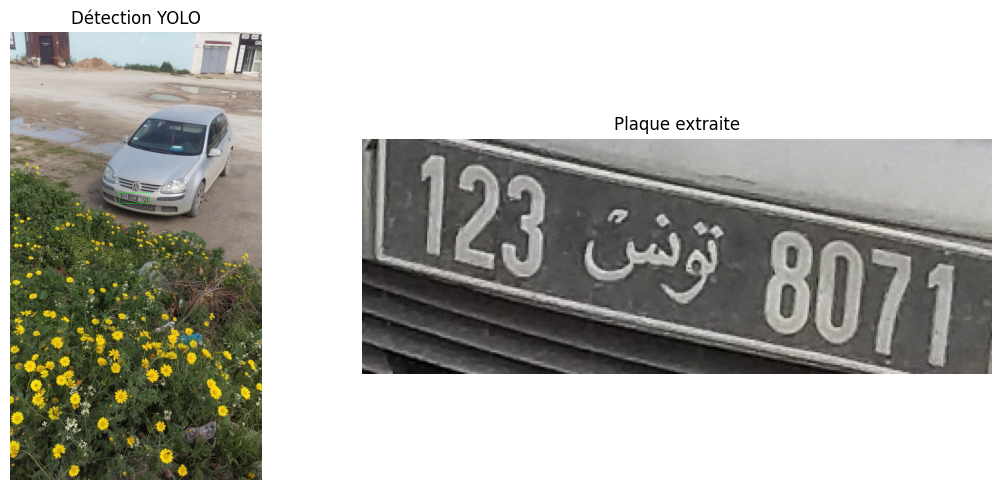

In [39]:
"""
3_extraction_plaque.py
Détection YOLO + extraction de la région plaque
"""

from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(" ÉTAPE 3 : EXTRACTION DE LA RÉGION PLAQUE")
print("="*50)

# Charger le modèle YOLO
MODEL_PATH = '/content/runs/detect/tunisian_plates_training2/weights/best.pt'
model = YOLO(MODEL_PATH)
print(f" Modèle chargé : {MODEL_PATH}")

def detect_and_extract_plate(image_path, confidence=0.2):
    """
    Détecte une plaque et extrait la région
    """
    # 1. Détection YOLO
    results = model(image_path, conf=confidence, verbose=False)[0]

    if len(results.boxes) == 0:
        print(" Aucune plaque détectée")
        return None, None

    # 2. Prendre la meilleure détection
    best_box = results.boxes[0]
    x1, y1, x2, y2 = map(int, best_box.xyxy[0].tolist())

    # 3. Lire et extraire
    img = cv2.imread(image_path)
    plate_roi = img[y1:y2, x1:x2]

    # Informations
    info = {
        'coords': (x1, y1, x2, y2),
        'size': (x2-x1, y2-y1),
        'confidence': float(best_box.conf[0].item())
    }

    print(f" Plaque extraite : {info['size'][0]}x{info['size'][1]} px")
    print(f"   Confiance : {info['confidence']:.2%}")

    return plate_roi, info

# Test
image_path = '/content/data/yolo_tunisian_correct/images/test/0.jpg'
plate_img, plate_info = detect_and_extract_plate(image_path)

if plate_img is not None:
    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Image originale avec rectangle
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x1, y1, x2, y2 = plate_info['coords']
    cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)

    axes[0].imshow(img_rgb)
    axes[0].set_title("Détection YOLO")
    axes[0].axis('off')

    # ROI extraite
    axes[1].imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Plaque extraite")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

**PRÉTRAITEMENT DE LA PLAQUE**

 ÉTAPE 4 : PRÉTRAITEMENT POUR OCR
 Prétraitement terminé
   Original : (130, 348, 3)
   Final : (120, 254)


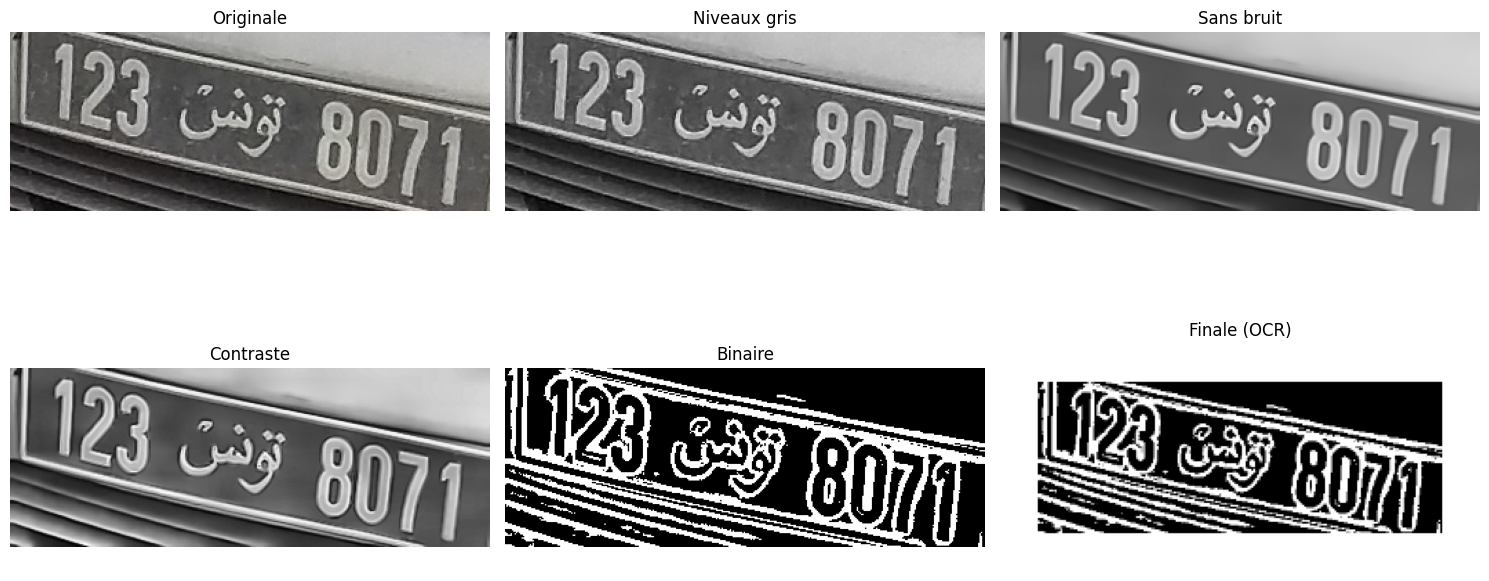

In [40]:
"""
4_pretraitement.py
Prétraitement de l'image plaque pour OCR
"""

import cv2
import numpy as np
import matplotlib.pyplot as plt

print(" ÉTAPE 4 : PRÉTRAITEMENT POUR OCR")
print("="*50)

def preprocess_plate(plate_img):
    """
    Améliore une image de plaque pour la reconnaissance OCR
    """
    if plate_img is None or plate_img.size == 0:
        return None

    # 1. Convertir en niveaux de gris
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)

    # 2. Réduction du bruit
    denoised = cv2.fastNlMeansDenoising(gray, h=20)

    # 3. Amélioration du contraste (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    contrast = clahe.apply(denoised)

    # 4. Binarisation adaptative (meilleure pour plaques)
    binary = cv2.adaptiveThreshold(
        contrast, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 15, 5
    )

    # 5. Vérifier si besoin d'inversion
    white_pixels = np.sum(binary == 255)
    black_pixels = np.sum(binary == 0)

    if white_pixels > black_pixels * 2:
        binary = cv2.bitwise_not(binary)

    # 6. Redimensionnement optimal
    height, width = binary.shape
    target_height = 80  # Hauteur fixe pour EasyOCR
    scale = target_height / height
    new_width = int(width * scale)
    resized = cv2.resize(binary, (new_width, target_height))

    # 7. Ajouter de la marge
    border_size = 20
    final = cv2.copyMakeBorder(
        resized,
        border_size, border_size, border_size, border_size,
        cv2.BORDER_CONSTANT,
        value=255  # Blanc
    )

    print(f" Prétraitement terminé")
    print(f"   Original : {plate_img.shape}")
    print(f"   Final : {final.shape}")

    # Retourner toutes les étapes pour visualisation
    return {
        'original': plate_img,
        'gray': gray,
        'denoised': denoised,
        'contrast': contrast,
        'binary': binary,
        'final': final
    }

# Test avec une plaque extraite
if 'plate_img' in locals() and plate_img is not None:
    processed = preprocess_plate(plate_img)

    # Visualiser toutes les étapes
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    images = [
        ('Originale', cv2.cvtColor(processed['original'], cv2.COLOR_BGR2RGB)),
        ('Niveaux gris', processed['gray']),
        ('Sans bruit', processed['denoised']),
        ('Contraste', processed['contrast']),
        ('Binaire', processed['binary']),
        ('Finale (OCR)', processed['final'])
    ]

    for idx, (title, img) in enumerate(images):
        row, col = divmod(idx, 3)
        ax = axes[row, col]

        if len(img.shape) == 2:
            ax.imshow(img, cmap='gray')
        else:
            ax.imshow(img)

        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("  Exécutez d'abord l'étape 3 pour extraire une plaque")

**OCR AVEC EASYOCR**

WARN:easyocr.easyocr:Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


 ÉTAPE 5 : EASYOCR OPTIMISÉ POUR PLAQUES
 Initialisation EasyOCR...
 EasyOCR prêt

 Test OCR sur plaque prétraitée...

 RÉSULTATS OCR :
   Texte brut : '0338070'
   Texte formaté : '0338070'
   Confiance : 49.41%
   Caractères : ['0', '3', '3', '8', '0', '7', '0']


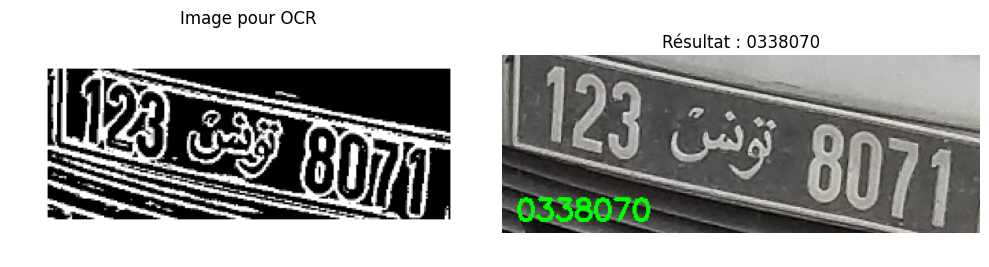

In [41]:
"""
5_easyocr_optimise.py
Reconnaissance OCR optimisée pour plaques avec EasyOCR
"""

import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

print(" ÉTAPE 5 : EASYOCR OPTIMISÉ POUR PLAQUES")
print("="*50)

# Initialiser EasyOCR (UNE FOIS)
print(" Initialisation EasyOCR...")
reader = easyocr.Reader(['en'], gpu=True)  # Anglais seulement
print(" EasyOCR prêt")

def read_plate_text(processed_image):
    """
    Lit le texte d'une plaque prétraitée
    """
    # Convertir en RGB pour EasyOCR
    if len(processed_image.shape) == 2:
        rgb_img = cv2.cvtColor(processed_image, cv2.COLOR_GRAY2RGB)
    else:
        rgb_img = processed_image

    # Paramètres OPTIMISÉS pour plaques
    results = reader.readtext(
        rgb_img,
        paragraph=False,       # Caractère par caractère
        width_ths=0.3,        # Regroupement horizontal strict
        height_ths=0.3,       # Regroupement vertical strict
        decoder='beamsearch', # Meilleur que greedy
        beamWidth=3,
        batch_size=1,
        contrast_ths=0.3,
        adjust_contrast=0.5,
        text_threshold=0.4,
        low_text=0.3,
        mag_ratio=1.2
    )

    # Filtrer et nettoyer
    valid_chars = []
    confidences = []

    for (bbox, text, prob) in results:
        # Nettoyer et mettre en majuscule
        clean_text = text.strip().upper()

        if prob > 0.2:  # Seuil minimum
            # Garder uniquement lettres et chiffres
            for char in clean_text:
                if char.isalnum():  # Lettre ou chiffre
                    valid_chars.append(char)
                    confidences.append(prob)

    # Reconstituer le texte
    if valid_chars:
        plate_text = ''.join(valid_chars)
        avg_confidence = np.mean(confidences)

        # Formater pour plaque tunisienne
        formatted = format_plate_tunisian(plate_text)

        return {
            'raw_text': plate_text,
            'formatted_text': formatted,
            'confidence': avg_confidence,
            'characters': valid_chars,
            'confidences': confidences
        }
    else:
        return {
            'raw_text': '',
            'formatted_text': '',
            'confidence': 0,
            'characters': [],
            'confidences': []
        }

def format_plate_tunisian(text):
    """
    Formate un texte en format de plaque tunisienne
    """
    if not text or len(text) < 4:
        return text

    # Séparer lettres et chiffres
    letters = ''.join([c for c in text if c.isalpha()])
    numbers = ''.join([c for c in text if c.isdigit()])

    # Formats courants en Tunisie
    if len(letters) == 2 and len(numbers) >= 4:
        # Format: 1234 TU 567
        if len(numbers) == 5:
            return f"{numbers[:4]} {letters} {numbers[4:]}"
        elif len(numbers) == 4:
            return f"{numbers[:3]} {letters} {numbers[3:]}"
        elif len(numbers) >= 6:
            return f"{numbers[:4]} {letters} {numbers[4:]}"

    # Format par défaut
    return text

# Test
if 'processed' in locals() and processed is not None:
    print("\n Test OCR sur plaque prétraitée...")
    ocr_result = read_plate_text(processed['final'])

    print(f"\n RÉSULTATS OCR :")
    print(f"   Texte brut : '{ocr_result['raw_text']}'")
    print(f"   Texte formaté : '{ocr_result['formatted_text']}'")
    print(f"   Confiance : {ocr_result['confidence']:.2%}")
    print(f"   Caractères : {ocr_result['characters']}")

    # Visualisation
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Image prétraitée
    axes[0].imshow(processed['final'], cmap='gray')
    axes[0].set_title("Image pour OCR")
    axes[0].axis('off')

    # Résultat avec texte
    result_img = cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB)
    h, w = result_img.shape[:2]

    # Ajouter le texte reconnu
    text_to_display = ocr_result['formatted_text'] or ocr_result['raw_text']
    if text_to_display:
        cv2.putText(
            result_img,
            text_to_display,
            (10, h-10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.7, (0, 255, 0), 2
        )

    axes[1].imshow(result_img)
    axes[1].set_title(f"Résultat : {text_to_display}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("  Exécutez d'abord les étapes 3 et 4")

**OCR AVEC TESSERACT**

In [ ]:
print("\n ÉTAPE 6 : Reconnaissance avec Tesseract")
print("="*50)

def ocr_with_tesseract(processed_img):
    """
    Lecture OCR avec Tesseract
    """
    # Configuration spécifique plaques
    custom_config = r'--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 '

    # Pour plaques tunisiennes (format: 1234TU567)
    config_plaque = r'--oem 3 --psm 8'

    # Convertir pour Tesseract
    if len(processed_img.shape) == 3:
        gray_tess = cv2.cvtColor(processed_img, cv2.COLOR_RGB2GRAY)
    else:
        gray_tess = processed_img

    # 1. Essayer avec configuration standard
    text_standard = pytesseract.image_to_string(
        gray_tess,
        config=custom_config
    ).strip()

    # 2. Essayer avec configuration plaque
    text_plaque = pytesseract.image_to_string(
        gray_tess,
        config=config_plaque
    ).strip()

    # 3. Obtenir les données détaillées
    data = pytesseract.image_to_data(
        gray_tess,
        config=custom_config,
        output_type=pytesseract.Output.DICT
    )

    # Filtrer les caractères avec bonne confiance
    confident_chars = []
    confidences = []

    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 60:  # Seuil de confiance
            char = data['text'][i].strip()
            if char:  # Ignorer les espaces vides
                confident_chars.append(char)
                confidences.append(int(data['conf'][i])/100)

    text_filtered = ''.join(confident_chars)
    avg_conf = np.mean(confidences) if confidences else 0

    return {
        'text_standard': text_standard,
        'text_plaque': text_plaque,
        'text_filtered': text_filtered,
        'confidence': avg_conf,
        'characters': confident_chars,
        'confidences': confidences,
        'raw_data': data
    }

# Test Tesseract
if plate_img is not None:
    tess_result = ocr_with_tesseract(processed['processed'])

    print(f" Résultat Tesseract:")
    print(f"   Standard: '{tess_result['text_standard']}'")
    print(f"   Plaque: '{tess_result['text_plaque']}'")
    print(f"   Filtré: '{tess_result['text_filtered']}'")
    print(f"   Confiance: {tess_result['confidence']:.2%}")

In [ ]:
print(" DIAGNOSTIC TESSERACT")
print("="*50)

# Voir ce que voit vraiment Tesseract
if plate_img is not None:
    # Afficher l'image que Tesseract reçoit
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(plate_img, cv2.COLOR_BGR2RGB))
    plt.title("Plaque originale")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(processed['processed'], cmap='gray')
    plt.title("Image prétraitée")
    plt.axis('off')

    # Essayer avec différents réglages Tesseract
    test_configs = [
        ("PSM 7 (ligne simple)", r'--oem 3 --psm 7'),
        ("PSM 8 (mot unique)", r'--oem 3 --psm 8'),
        ("PSM 10 (caractère unique)", r'--oem 3 --psm 10'),
        ("PSM 13 (ligne brute)", r'--oem 3 --psm 13'),
    ]

    for i, (name, config) in enumerate(test_configs):
        text = pytesseract.image_to_string(processed['processed'], config=config).strip()
        print(f"  {name}: '{text}'")

    print("\n Diagnostic terminé : Tesseract n'est pas adapté aux plaques")